In [19]:
import os
import PIL
import pathlib
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import re
import pandas as pd
import shutil
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from keras import backend as K
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.callbacks import LearningRateScheduler

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import random
import cv2
import zipfile
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
# Upload files
#uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
zip_file_path = '/content/drive/MyDrive/brain_tumor_dataset.zip'
extract_to = 'extracted_file'
def extract_zip(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
extract_zip(zip_file_path, extract_to)

In [4]:
data_dir = pathlib.Path('/content/extracted_file/brain_tumor_dataset').with_suffix('')
images = (list(data_dir.glob('*/*')))
random.seed(113)
random.shuffle(images)

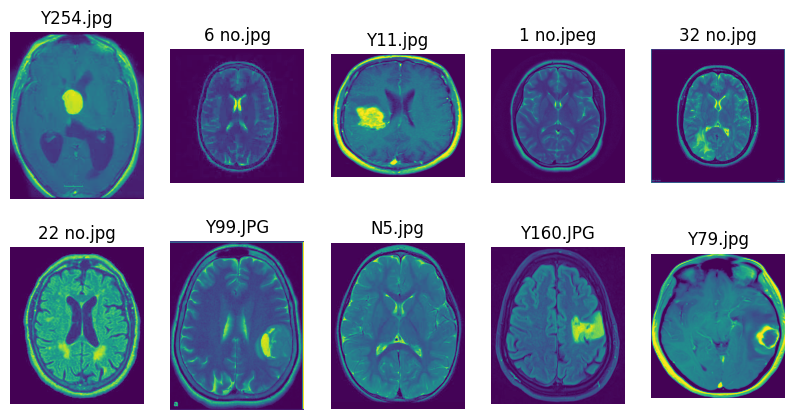

In [5]:
# Demonstration
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(PIL.Image.open(images[i]).convert('L'))
    plt.title(str(images[i]).split("/")[-1])
    plt.axis('off')


In [6]:
dimensions = []
for image in images:
  with PIL.Image.open(image) as img:
    dimensions.append(list(img.size))

dimensions = np.array(dimensions)
dimensions.shape

(253, 2)

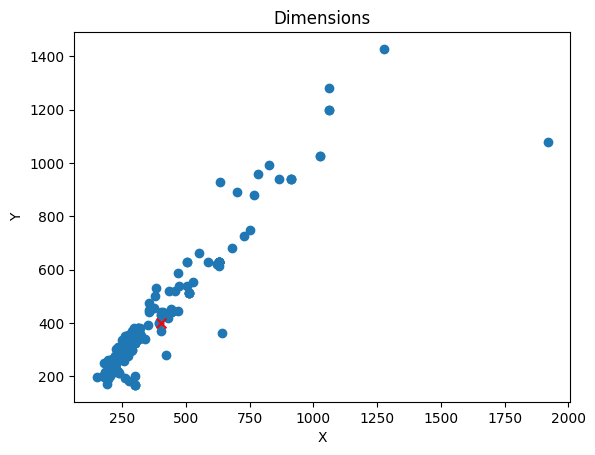

In [7]:
# Scatter dimentions
x = dimensions[:, 0]
y = dimensions[:, 1]
target_width = 400
target_height = 400
plt.scatter(x, y)
plt.scatter(target_width, target_height, color='red', marker='x', s=50, label='Specific Point')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dimensions')
plt.show()

In [8]:
def add_padding(images):
  padded_img, labels = [], []

  for image in images:
    with PIL.Image.open(image) as img:
      img_width, img_height = img.size

      width_ratio = target_width / img_width
      height_ratio = target_height / img_height

      ratio = min(width_ratio, height_ratio)

      new_width = int(img_width * ratio)
      new_height = int(img_height * ratio)

      resized_img = img.resize((new_width, new_height), PIL.Image.NEAREST)
      letterbox_img = PIL.Image.new('L', (target_width, target_height))

      left_offset = (target_width - new_width) // 2
      top_offset = (target_height - new_height) // 2

      letterbox_img.paste(resized_img, (left_offset, top_offset))
      padded_img.append((letterbox_img.convert('L')))

      if len(re.findall(".*y.*|.*Y.*", str(image).split("/")[-1])) != 0:
        labels.append(1) #YES
      else:
        labels.append(0) #NO
  padded_img = np.reshape(padded_img, (-1, 400, 400))
  labels = np.array(labels)
  return padded_img, labels

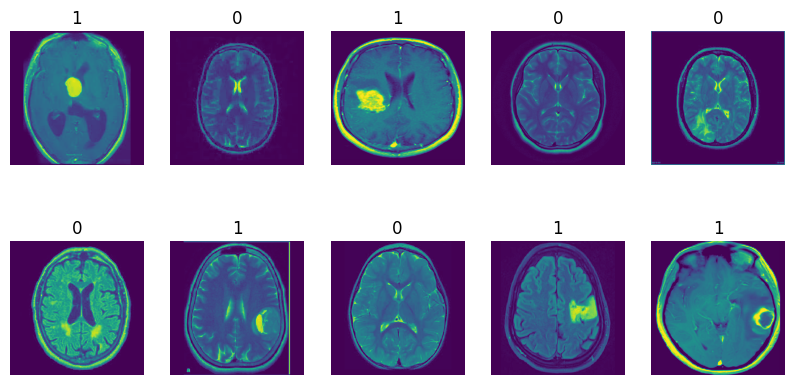

In [9]:
padded_img, labels = add_padding(images)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(padded_img[i])
    plt.title(labels[i])
    plt.axis('off')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(padded_img, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [11]:
print('X_train: \n',X_train)

X_train: 
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[4 4 4 ... 4 4 4]
  [4 4 4 ... 4 4 4]
  [4 4 4 ... 4 4 4]
  ...
  [4 4 4 ... 4 4 4]
  [4 4 4 ... 4 4 4]
  [4 4 4 ... 4 4 4]]]


In [12]:
print('y_train: \n',y_train)

y_train: 
 [1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0]


In [13]:
def res_block(x, filters):
  fx = layers.Conv2D(filters, (3,3), padding='same', strides=(1,1), activation='relu')(x)
  fx = layers.BatchNormalization()(fx)
  fx = layers.Conv2D(filters, (3,3), padding='same', strides=(1,1))(fx)
  fx = layers.BatchNormalization()(fx)
  out = layers.Add()([x, fx])
  out = layers.Activation('relu')(out)
  #out = layers.BatchNormalization()(out)
  return out

Model: "Model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d (Depthwis  (None, 398, 398, 1)          10        ['input_1[0][0]']             
 eConv2D)                                                                                         
                                                                                                  
 conv2d (Conv2D)             (None, 398, 398, 8)          80        ['depthwise_conv2d[0][0]']    
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 199, 199, 8)          0         ['conv2d[0][0]']        

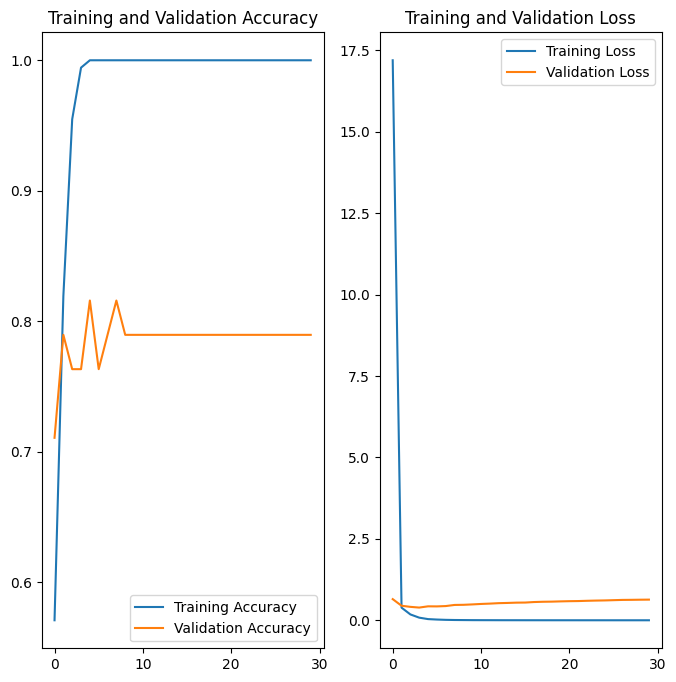

2/2 [==============================] - 1s 347ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-Score: 0.888888888888889


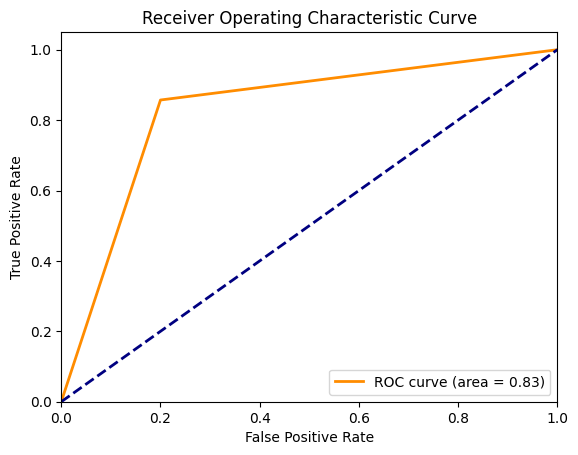

Epoch 1/30
36/36 [==============================] - 2s 24ms/step - loss: 56.2472 - accuracy: 0.5480 - val_loss: 5.1334 - val_accuracy: 0.4211
Epoch 2/30
36/36 [==============================] - 1s 14ms/step - loss: 0.8782 - accuracy: 0.7627 - val_loss: 0.5234 - val_accuracy: 0.7895
Epoch 3/30
36/36 [==============================] - 1s 15ms/step - loss: 0.2154 - accuracy: 0.9322 - val_loss: 0.5993 - val_accuracy: 0.6053
Epoch 4/30
36/36 [==============================] - 1s 15ms/step - loss: 0.0971 - accuracy: 0.9718 - val_loss: 0.4001 - val_accuracy: 0.8684
Epoch 5/30
36/36 [==============================] - 0s 13ms/step - loss: 0.0309 - accuracy: 0.9944 - val_loss: 0.4690 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 0s 12ms/step - loss: 0.0150 - accuracy: 0.9944 - val_loss: 0.6065 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 0s 12ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.5889 - val_accuracy: 0.7895
Epoch 8/30
3

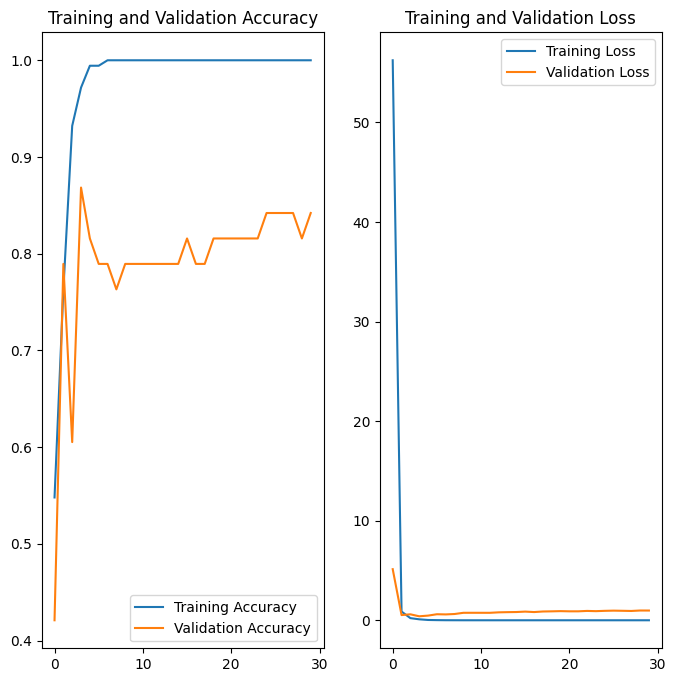

2/2 [==============================] - 0s 11ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-Score: 0.888888888888889


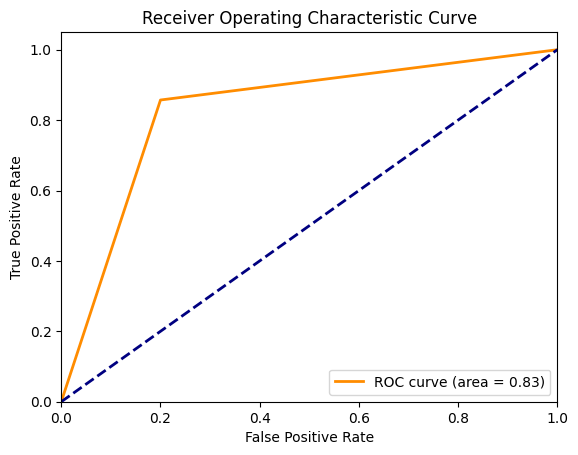

Epoch 1/30
36/36 [==============================] - 2s 22ms/step - loss: 34.2238 - accuracy: 0.6158 - val_loss: 1.8371 - val_accuracy: 0.6842
Epoch 2/30
36/36 [==============================] - 0s 13ms/step - loss: 0.9765 - accuracy: 0.7853 - val_loss: 0.7198 - val_accuracy: 0.8158
Epoch 3/30
36/36 [==============================] - 0s 12ms/step - loss: 0.2115 - accuracy: 0.9322 - val_loss: 0.6303 - val_accuracy: 0.8684
Epoch 4/30
36/36 [==============================] - 0s 12ms/step - loss: 0.1001 - accuracy: 0.9661 - val_loss: 0.7556 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 0s 12ms/step - loss: 0.0580 - accuracy: 0.9831 - val_loss: 0.7133 - val_accuracy: 0.8421
Epoch 6/30
36/36 [==============================] - 0s 13ms/step - loss: 0.0341 - accuracy: 0.9944 - val_loss: 0.7073 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 0s 13ms/step - loss: 0.0214 - accuracy: 0.9944 - val_loss: 0.6851 - val_accuracy: 0.8158
Epoch 8/30
3

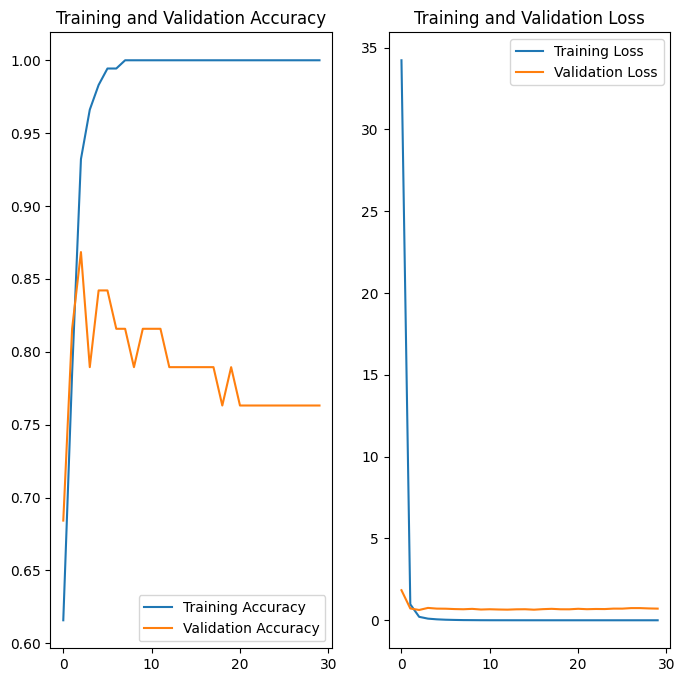

2/2 [==============================] - 0s 12ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-Score: 0.888888888888889


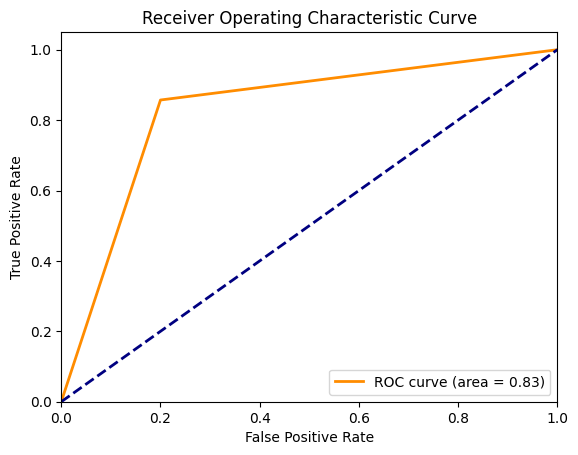

In [24]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(100, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_1 = tf.keras.Model(x,y)
    model_1._name = 'Model_1'

    if i == 0:
        model_1.summary()

    # COMPILING
    model_1.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')

    # TRAINING
    epochs = 30
    history = model_1.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_1.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_1
    del history


Model: "Model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_3 (Depthw  (None, 398, 398, 1)          10        ['input_4[0][0]']             
 iseConv2D)                                                                                       
                                                                                                  
 conv2d_15 (Conv2D)          (None, 398, 398, 8)          80        ['depthwise_conv2d_3[0][0]']  
                                                                                                  
 max_pooling2d_12 (MaxPooli  (None, 199, 199, 8)          0         ['conv2d_15[0][0]']     

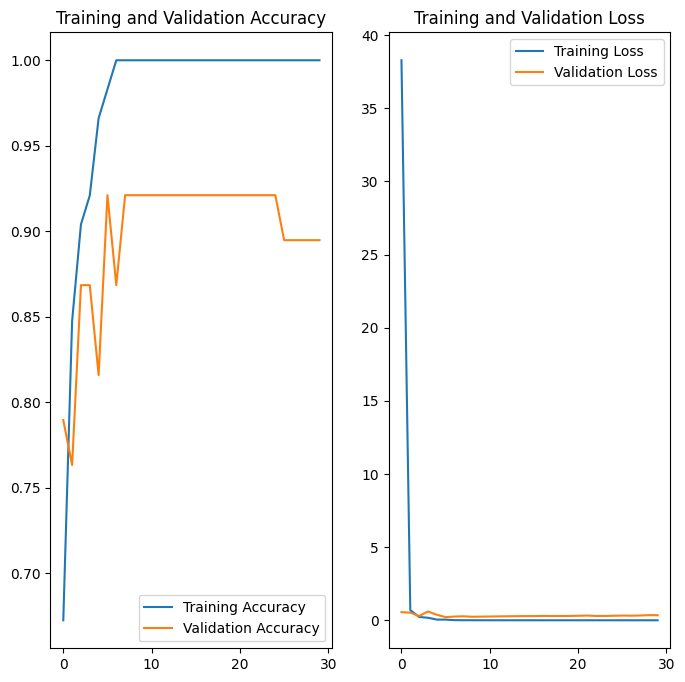

2/2 [==============================] - 0s 17ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-Score: 0.888888888888889


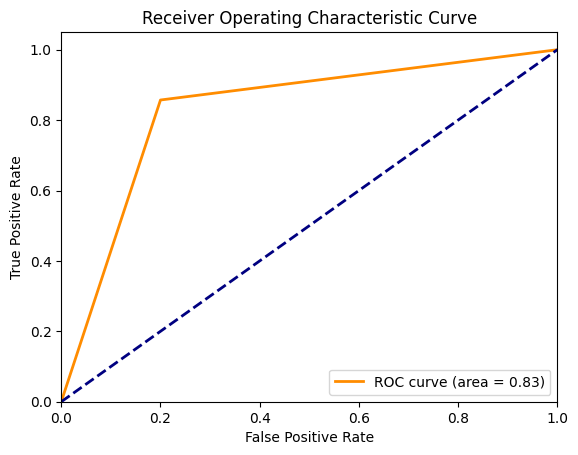

Epoch 1/30
36/36 [==============================] - 2s 20ms/step - loss: 39.8063 - accuracy: 0.5706 - val_loss: 1.7027 - val_accuracy: 0.8158
Epoch 2/30
36/36 [==============================] - 0s 13ms/step - loss: 0.7326 - accuracy: 0.8136 - val_loss: 0.8381 - val_accuracy: 0.5000
Epoch 3/30
36/36 [==============================] - 0s 12ms/step - loss: 0.2633 - accuracy: 0.8757 - val_loss: 0.5264 - val_accuracy: 0.7895
Epoch 4/30
36/36 [==============================] - 0s 12ms/step - loss: 0.2057 - accuracy: 0.9548 - val_loss: 0.6642 - val_accuracy: 0.7632
Epoch 5/30
36/36 [==============================] - 0s 13ms/step - loss: 0.1059 - accuracy: 0.9661 - val_loss: 0.5213 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 0s 12ms/step - loss: 0.0402 - accuracy: 0.9831 - val_loss: 0.5174 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 0s 12ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.6022 - val_accuracy: 0.7895
Epoch 8/30
3

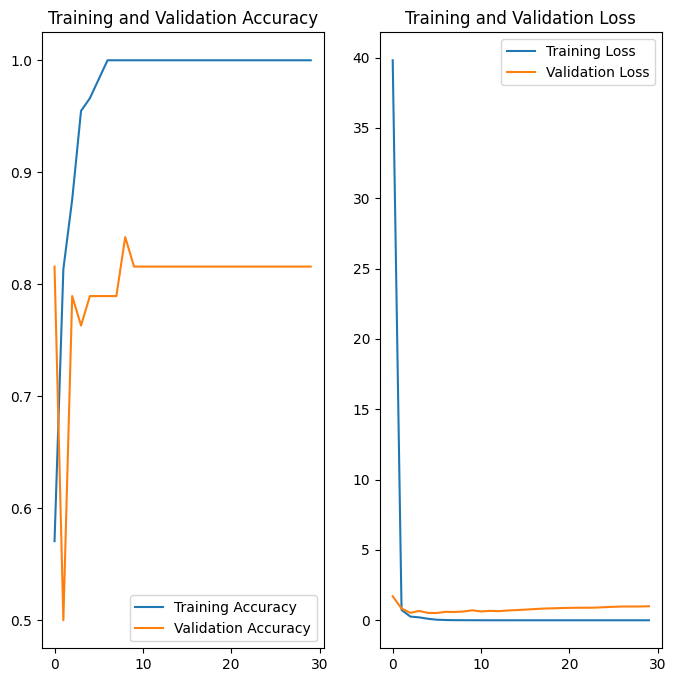

2/2 [==============================] - 0s 11ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-Score: 0.888888888888889


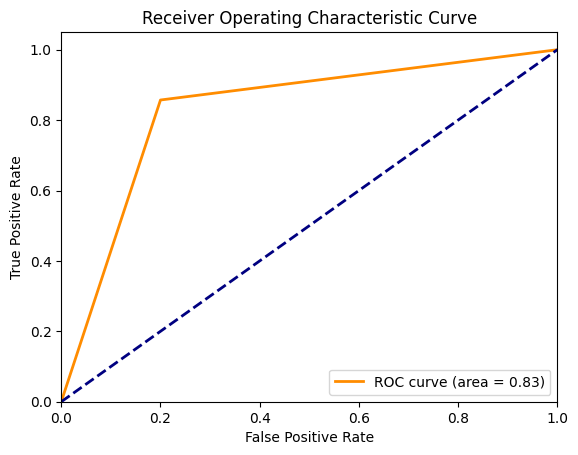

Epoch 1/30
36/36 [==============================] - 2s 23ms/step - loss: 34.8770 - accuracy: 0.6441 - val_loss: 0.7616 - val_accuracy: 0.6842
Epoch 2/30
36/36 [==============================] - 0s 11ms/step - loss: 0.5247 - accuracy: 0.7119 - val_loss: 0.4924 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 0s 12ms/step - loss: 0.3388 - accuracy: 0.8475 - val_loss: 0.4317 - val_accuracy: 0.8158
Epoch 4/30
36/36 [==============================] - 0s 13ms/step - loss: 0.2025 - accuracy: 0.9040 - val_loss: 0.2985 - val_accuracy: 0.8158
Epoch 5/30
36/36 [==============================] - 0s 13ms/step - loss: 0.1331 - accuracy: 0.9435 - val_loss: 0.2563 - val_accuracy: 0.8684
Epoch 6/30
36/36 [==============================] - 1s 14ms/step - loss: 0.0858 - accuracy: 0.9774 - val_loss: 0.2576 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 1s 15ms/step - loss: 0.0651 - accuracy: 0.9774 - val_loss: 0.3116 - val_accuracy: 0.8947
Epoch 8/30
3

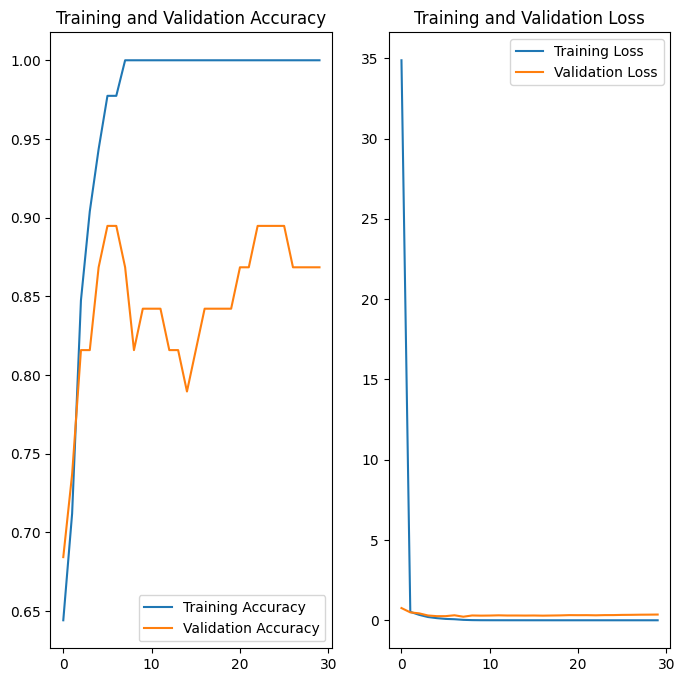

2/2 [==============================] - 0s 12ms/step
Overall Accuracy: 0.7631578947368421
Precision: 0.9130434782608695
Recall: 0.75
F1-Score: 0.8235294117647057


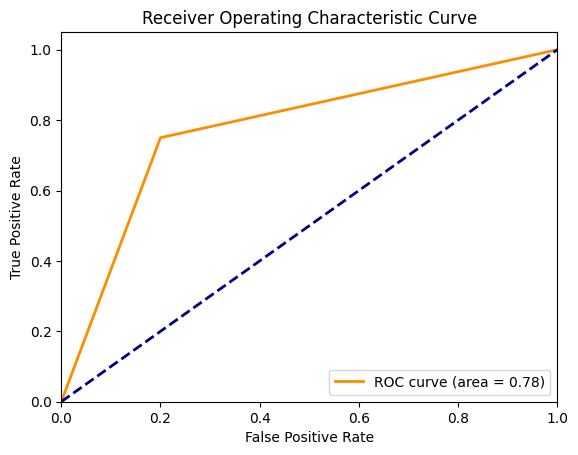

In [25]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2 = tf.keras.Model(x,y)
    model_2._name = 'Model_2'

    if i == 0:
        model_2.summary()

    # COMPILING
    model_2.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')

    # TRAINING
    epochs = 30
    history = model_2.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_2
    del history

In [17]:
def res_block_adj(x, ch_in, ch_out):
  fx = layers.Conv2D(ch_in/2, (1,1), padding='same', strides=(1,1), activation='relu')(x)
  fx = layers.Conv2D(ch_in/2, (3,3), padding='same', strides=(1,1), activation='relu')(fx)
  fx = layers.Conv2D(ch_out, (1,1), padding='same', strides=(1,1))(fx)

  skip_connection = layers.Conv2D(ch_out, (1,1), padding='same', strides=(1,1))(x)

  out = layers.Add()([skip_connection, fx])
  out = layers.Activation('relu')(out)
  return out

Model: "Model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_6 (Depthw  (None, 398, 398, 1)          10        ['input_7[0][0]']             
 iseConv2D)                                                                                       
                                                                                                  
 conv2d_30 (Conv2D)          (None, 398, 398, 8)          208       ['depthwise_conv2d_6[0][0]']  
                                                                                                  
 max_pooling2d_24 (MaxPooli  (None, 199, 199, 8)          0         ['conv2d_30[0][0]']     

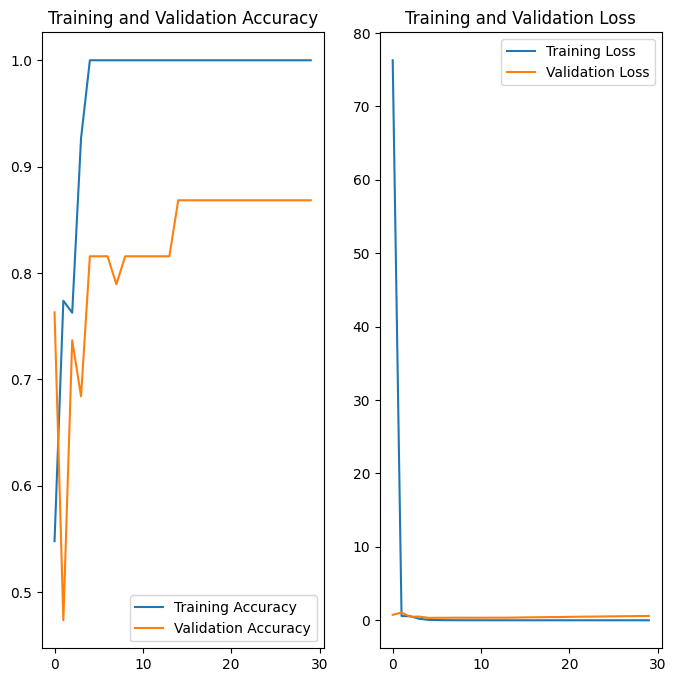

2/2 [==============================] - 1s 481ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.92
Recall: 0.8214285714285714
F1-Score: 0.8679245283018867


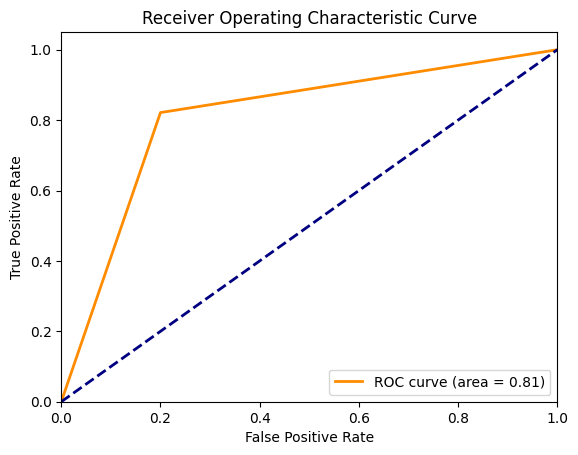

Epoch 1/30
36/36 [==============================] - 3s 31ms/step - loss: 52.9413 - accuracy: 0.6667 - val_loss: 6.6233 - val_accuracy: 0.4737
Epoch 2/30
36/36 [==============================] - 1s 18ms/step - loss: 2.4537 - accuracy: 0.7458 - val_loss: 1.3683 - val_accuracy: 0.7895
Epoch 3/30
36/36 [==============================] - 1s 16ms/step - loss: 0.5841 - accuracy: 0.8814 - val_loss: 0.2780 - val_accuracy: 0.8947
Epoch 4/30
36/36 [==============================] - 1s 15ms/step - loss: 0.0745 - accuracy: 0.9661 - val_loss: 0.1171 - val_accuracy: 0.9474
Epoch 5/30
36/36 [==============================] - 1s 17ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.1292 - val_accuracy: 0.9474
Epoch 6/30
36/36 [==============================] - 1s 16ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.1892 - val_accuracy: 0.9474
Epoch 7/30
36/36 [==============================] - 1s 15ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1414 - val_accuracy: 0.9474
Epoch 8/30
3

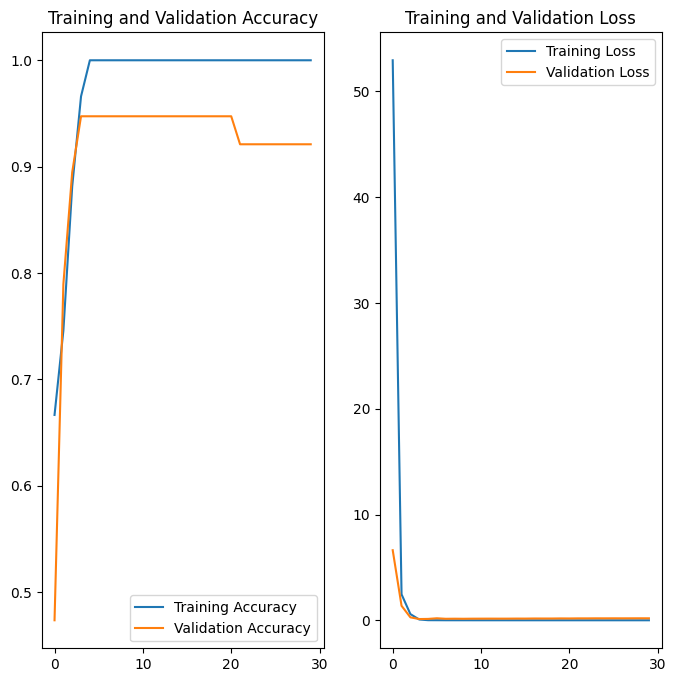

2/2 [==============================] - 0s 25ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.9259259259259259
Recall: 0.8928571428571429
F1-Score: 0.9090909090909091


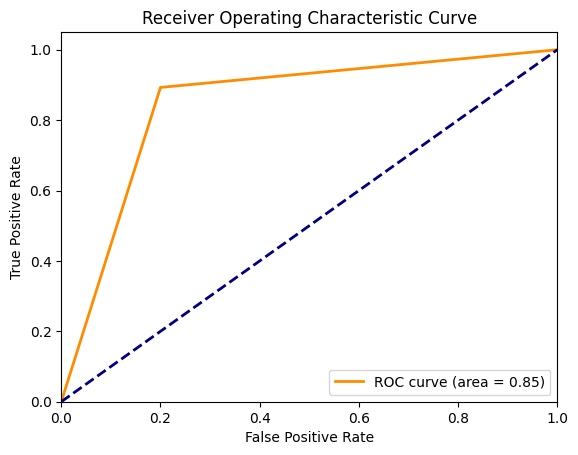

Epoch 1/30
36/36 [==============================] - 2s 26ms/step - loss: 38.3200 - accuracy: 0.5819 - val_loss: 2.6169 - val_accuracy: 0.7368
Epoch 2/30
36/36 [==============================] - 1s 15ms/step - loss: 1.3187 - accuracy: 0.7853 - val_loss: 0.4012 - val_accuracy: 0.8158
Epoch 3/30
36/36 [==============================] - 1s 17ms/step - loss: 0.2255 - accuracy: 0.9153 - val_loss: 0.4494 - val_accuracy: 0.7895
Epoch 4/30
36/36 [==============================] - 1s 16ms/step - loss: 0.1087 - accuracy: 0.9661 - val_loss: 0.3662 - val_accuracy: 0.8684
Epoch 5/30
36/36 [==============================] - 1s 17ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.3539 - val_accuracy: 0.8684
Epoch 6/30
36/36 [==============================] - 1s 18ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.3576 - val_accuracy: 0.8684
Epoch 7/30
36/36 [==============================] - 1s 16ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.3573 - val_accuracy: 0.8947
Epoch 8/30
3

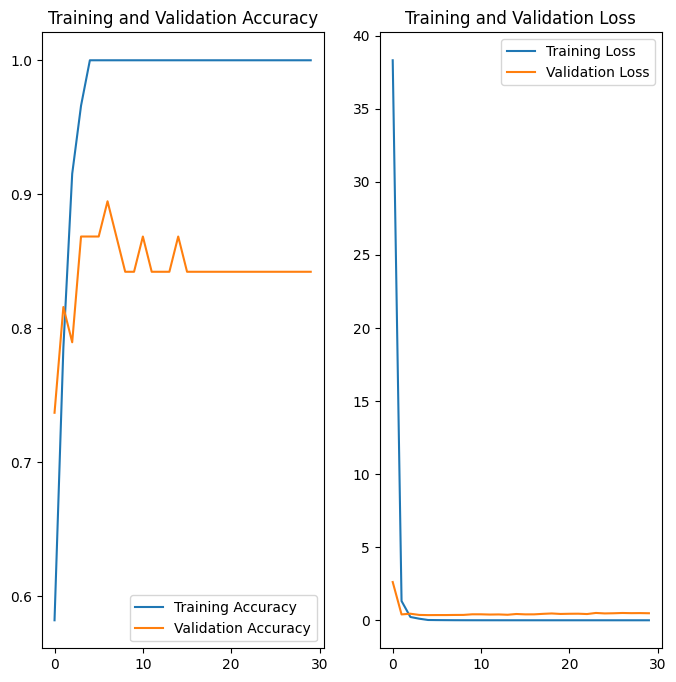

2/2 [==============================] - 0s 18ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.92
Recall: 0.8214285714285714
F1-Score: 0.8679245283018867


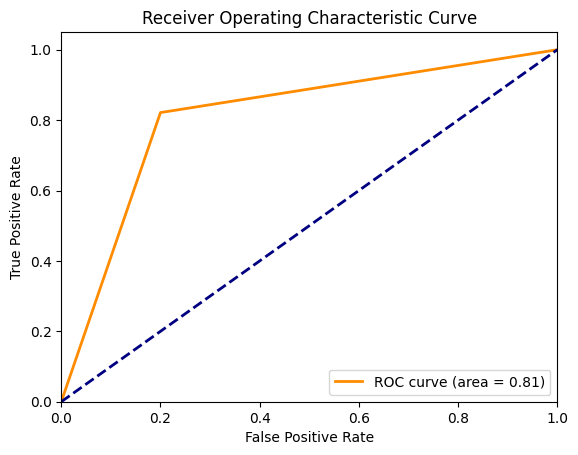

In [27]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_3 = tf.keras.Model(x,y)
    model_3._name = 'Model_3'

    if i == 0:
        model_3.summary()

    # COMPILING
    model_3.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')

    # TRAINING
    epochs = 30
    history = model_3.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_3.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_3
    del history

Model: "Model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_15 (Depth  (None, 398, 398, 1)          10        ['input_19[0][0]']            
 wiseConv2D)                                                                                      
                                                                                                  
 conv2d_207 (Conv2D)         (None, 398, 398, 8)          208       ['depthwise_conv2d_15[0][0]'] 
                                                                                                  
 max_pooling2d_84 (MaxPooli  (None, 199, 199, 8)          0         ['conv2d_207[0][0]']    

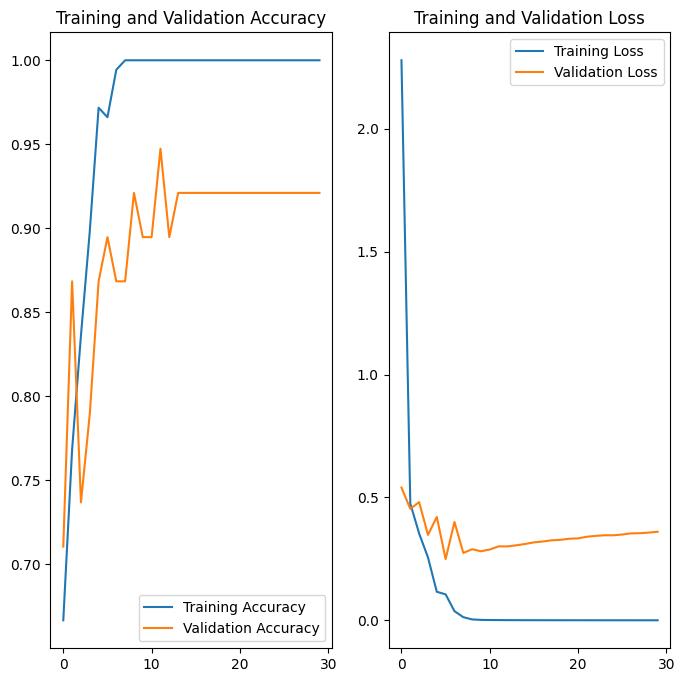

2/2 [==============================] - 0s 21ms/step
Overall Accuracy: 0.868421052631579
Confusion Matrix:
[[ 8  2]
 [ 3 25]]
Precision: 0.9259259259259259
Recall: 0.8928571428571429
F1-Score: 0.9090909090909091


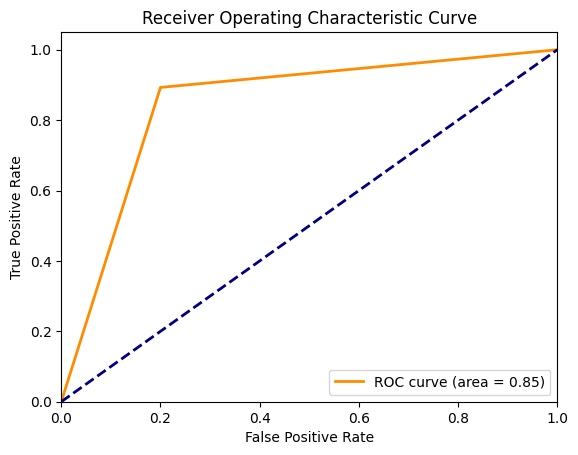

Epoch 1/30
36/36 [==============================] - 3s 30ms/step - loss: 1.3828 - accuracy: 0.6271 - val_loss: 0.5790 - val_accuracy: 0.6842
Epoch 2/30
36/36 [==============================] - 1s 16ms/step - loss: 0.5505 - accuracy: 0.7006 - val_loss: 0.6397 - val_accuracy: 0.6053
Epoch 3/30
36/36 [==============================] - 1s 17ms/step - loss: 0.4288 - accuracy: 0.7853 - val_loss: 0.5850 - val_accuracy: 0.6579
Epoch 4/30
36/36 [==============================] - 1s 18ms/step - loss: 0.3762 - accuracy: 0.8362 - val_loss: 0.4411 - val_accuracy: 0.8158
Epoch 5/30
36/36 [==============================] - 1s 16ms/step - loss: 0.2280 - accuracy: 0.9096 - val_loss: 0.3991 - val_accuracy: 0.8684
Epoch 6/30
36/36 [==============================] - 1s 17ms/step - loss: 0.0969 - accuracy: 0.9718 - val_loss: 0.3337 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 1s 17ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.5494 - val_accuracy: 0.8421
Epoch 8/30
36

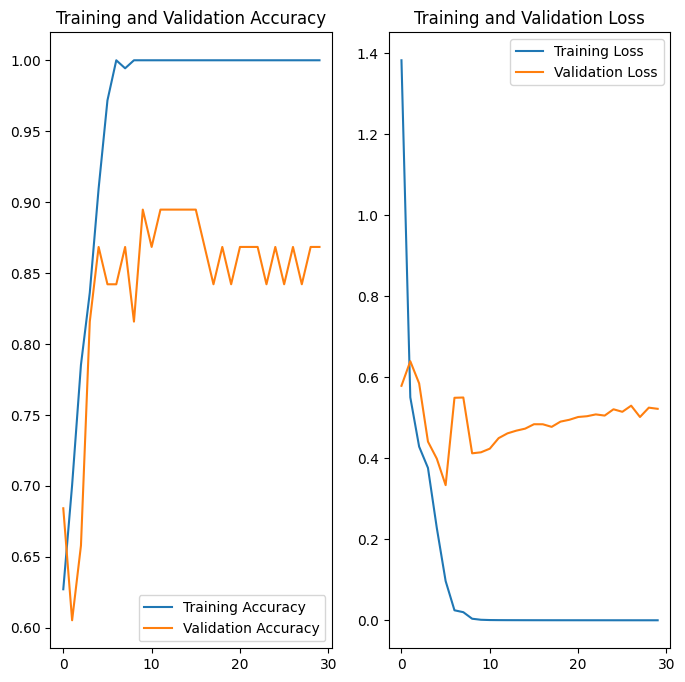

2/2 [==============================] - 0s 28ms/step
Overall Accuracy: 0.868421052631579
Confusion Matrix:
[[ 8  2]
 [ 3 25]]
Precision: 0.9259259259259259
Recall: 0.8928571428571429
F1-Score: 0.9090909090909091


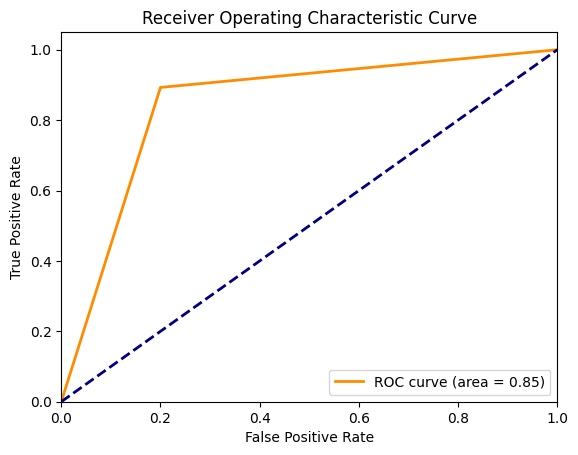

Epoch 1/30
36/36 [==============================] - 3s 31ms/step - loss: 6.1482 - accuracy: 0.5763 - val_loss: 1.1657 - val_accuracy: 0.5000
Epoch 2/30
36/36 [==============================] - 1s 16ms/step - loss: 0.4798 - accuracy: 0.8023 - val_loss: 0.5096 - val_accuracy: 0.7105
Epoch 3/30
36/36 [==============================] - 1s 16ms/step - loss: 0.4171 - accuracy: 0.8418 - val_loss: 0.4061 - val_accuracy: 0.8684
Epoch 4/30
36/36 [==============================] - 1s 18ms/step - loss: 0.2443 - accuracy: 0.9322 - val_loss: 0.5198 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 1s 16ms/step - loss: 0.1998 - accuracy: 0.9209 - val_loss: 0.3065 - val_accuracy: 0.8421
Epoch 6/30
36/36 [==============================] - 1s 17ms/step - loss: 0.1102 - accuracy: 0.9718 - val_loss: 0.2683 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 1s 18ms/step - loss: 0.0568 - accuracy: 1.0000 - val_loss: 0.2739 - val_accuracy: 0.8421
Epoch 8/30
36

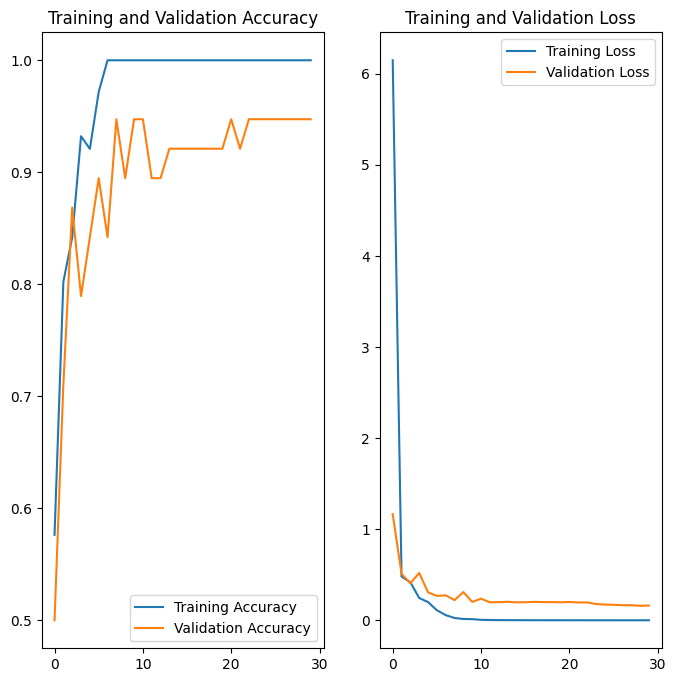

2/2 [==============================] - 1s 26ms/step
Overall Accuracy: 0.868421052631579
Confusion Matrix:
[[ 8  2]
 [ 3 25]]
Precision: 0.9259259259259259
Recall: 0.8928571428571429
F1-Score: 0.9090909090909091


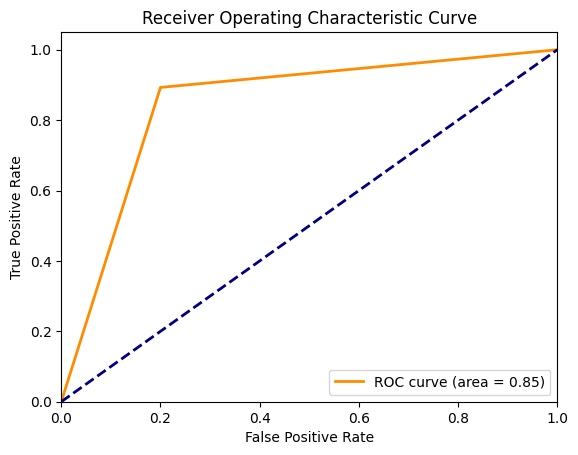

In [32]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 64, 128)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 128, 256)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_4 = tf.keras.Model(x,y)
    model_4._name = 'Model_4'

    if i == 0:
        model_4.summary()

    # COMPILING
    model_4.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')

    # TRAINING
    epochs = 30
    history = model_4.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_4.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_4
    del history

Model: "Model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_12 (Depth  (None, 398, 398, 1)          10        ['input_13[0][0]']            
 wiseConv2D)                                                                                      
                                                                                                  
 conv2d_132 (Conv2D)         (None, 398, 398, 8)          208       ['depthwise_conv2d_12[0][0]'] 
                                                                                                  
 max_pooling2d_54 (MaxPooli  (None, 199, 199, 8)          0         ['conv2d_132[0][0]']    

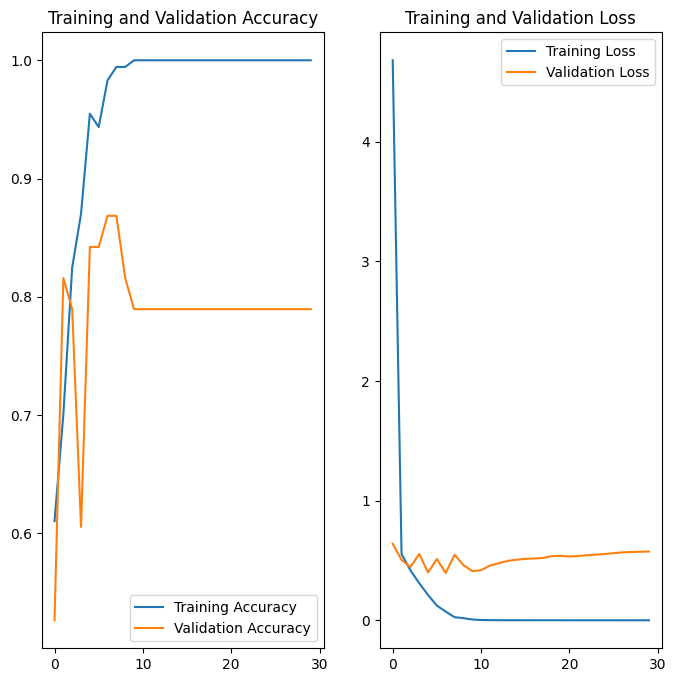

2/2 [==============================] - 0s 27ms/step
Overall Accuracy: 0.7631578947368421
Precision: 0.9130434782608695
Recall: 0.75
F1-Score: 0.8235294117647057


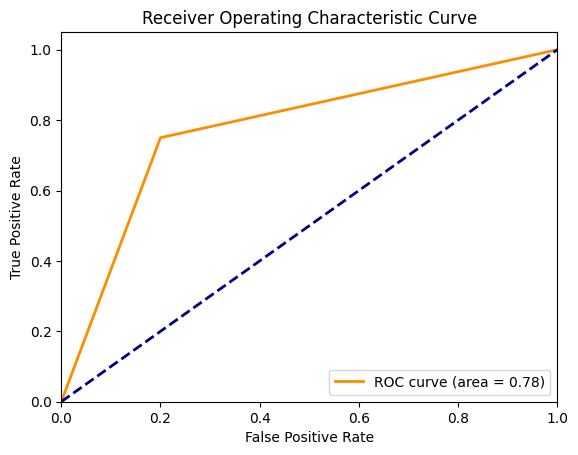

Epoch 1/30
36/36 [==============================] - 3s 27ms/step - loss: 2.3823 - accuracy: 0.5593 - val_loss: 0.5662 - val_accuracy: 0.7368
Epoch 2/30
36/36 [==============================] - 1s 15ms/step - loss: 0.5486 - accuracy: 0.7006 - val_loss: 0.5851 - val_accuracy: 0.6579
Epoch 3/30
36/36 [==============================] - 1s 15ms/step - loss: 0.4582 - accuracy: 0.8023 - val_loss: 0.6537 - val_accuracy: 0.5526
Epoch 4/30
36/36 [==============================] - 1s 15ms/step - loss: 0.3869 - accuracy: 0.8362 - val_loss: 0.4269 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 1s 15ms/step - loss: 0.2188 - accuracy: 0.9379 - val_loss: 0.5010 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 1s 15ms/step - loss: 0.1724 - accuracy: 0.9492 - val_loss: 0.4497 - val_accuracy: 0.8158
Epoch 7/30
36/36 [==============================] - 1s 15ms/step - loss: 0.1158 - accuracy: 0.9492 - val_loss: 0.4135 - val_accuracy: 0.8158
Epoch 8/30
36

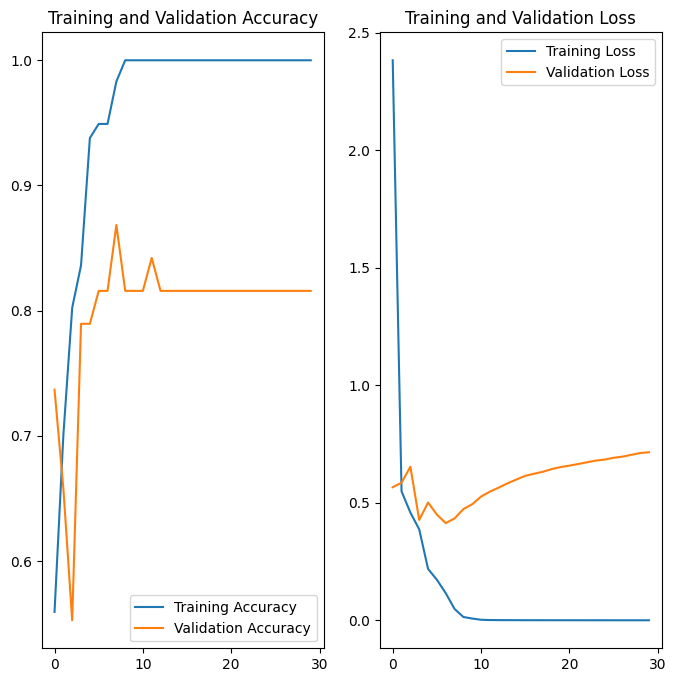

2/2 [==============================] - 0s 26ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-Score: 0.888888888888889


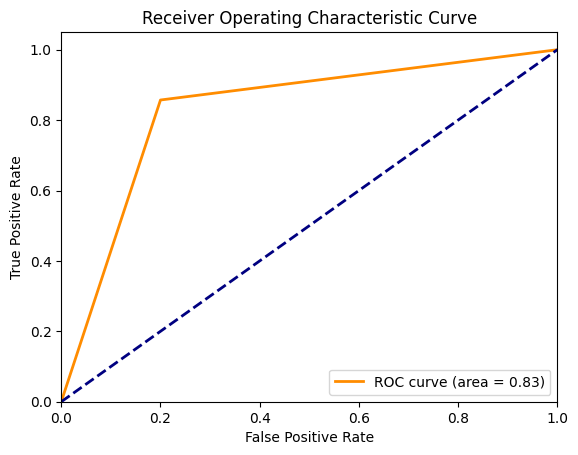

Epoch 1/30
36/36 [==============================] - 3s 33ms/step - loss: 8.3275 - accuracy: 0.6215 - val_loss: 0.6455 - val_accuracy: 0.7105
Epoch 2/30
36/36 [==============================] - 1s 18ms/step - loss: 0.3852 - accuracy: 0.8192 - val_loss: 0.7472 - val_accuracy: 0.6053
Epoch 3/30
36/36 [==============================] - 1s 18ms/step - loss: 0.2756 - accuracy: 0.8983 - val_loss: 0.3101 - val_accuracy: 0.8684
Epoch 4/30
36/36 [==============================] - 1s 17ms/step - loss: 0.1453 - accuracy: 0.9492 - val_loss: 0.3329 - val_accuracy: 0.8421
Epoch 5/30
36/36 [==============================] - 1s 16ms/step - loss: 0.0901 - accuracy: 0.9831 - val_loss: 0.2978 - val_accuracy: 0.8684
Epoch 6/30
36/36 [==============================] - 1s 16ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 0.6195 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 1s 16ms/step - loss: 0.0579 - accuracy: 0.9944 - val_loss: 0.5259 - val_accuracy: 0.8158
Epoch 8/30
36

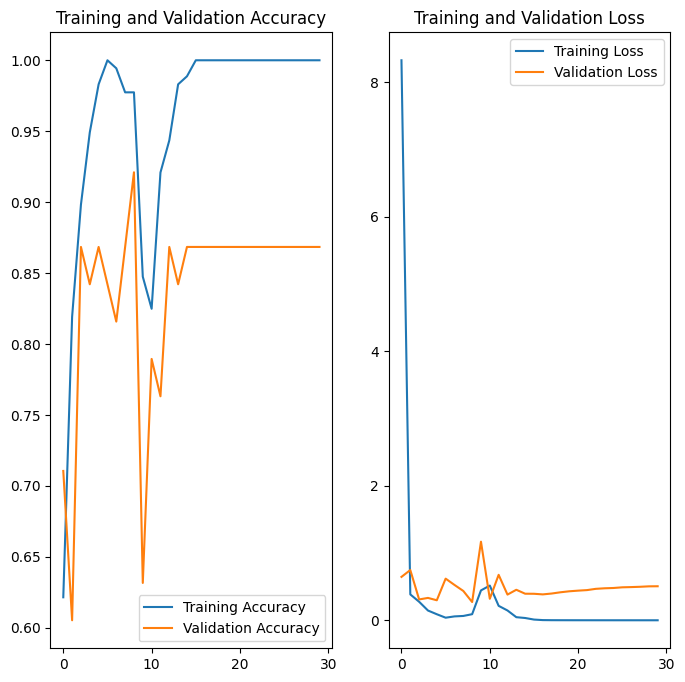

2/2 [==============================] - 0s 26ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-Score: 0.888888888888889


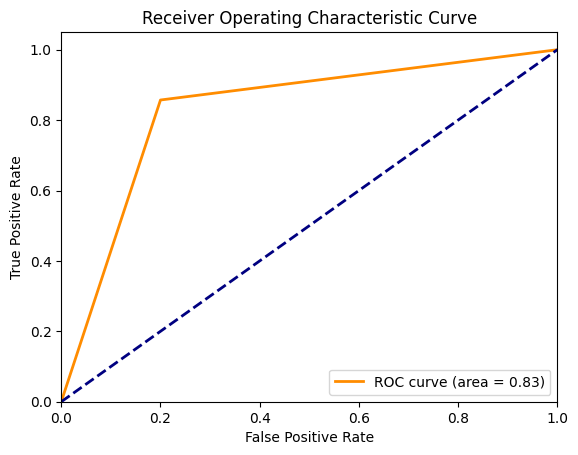

In [29]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 64, 128)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 128, 256)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(100, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_5 = tf.keras.Model(x,y)
    model_5._name = 'Model_5'

    if i == 0:
        model_5.summary()

    # COMPILING
    model_5.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')

    # TRAINING
    epochs = 30
    history = model_5.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_5.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_5
    del history

Model: "Model_sep_conv"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_195 (Conv2D)         (None, 400, 400, 8)          16        ['input_16[0][0]']            
                                                                                                  
 conv2d_196 (Conv2D)         (None, 400, 400, 8)          80        ['input_16[0][0]']            
                                                                                                  
 concatenate (Concatenate)   (None, 400, 400, 16)         0         ['conv2d_195[0][0]',          
                                                                     'conv2d_196[0][0

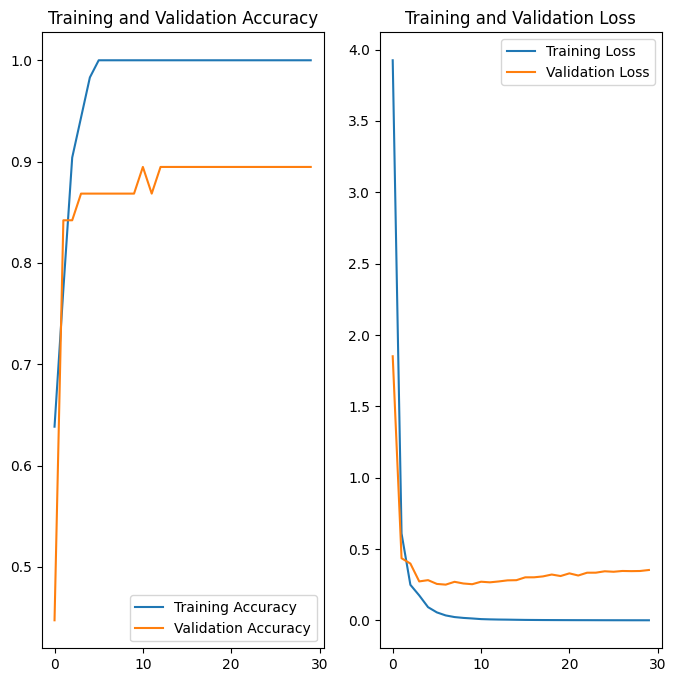

2/2 [==============================] - 1s 306ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-Score: 0.888888888888889


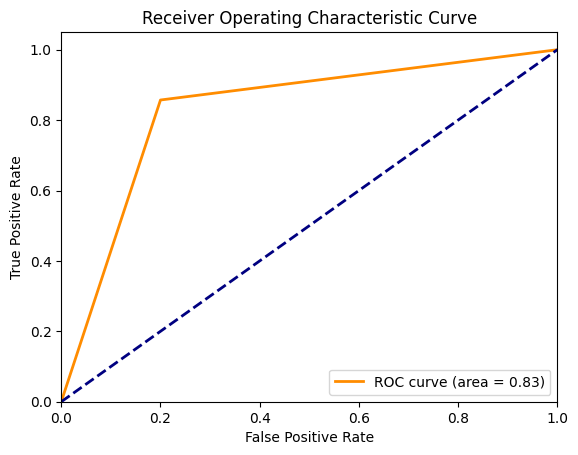

Epoch 1/30
36/36 [==============================] - 3s 32ms/step - loss: 1.8827 - accuracy: 0.5876 - val_loss: 0.5401 - val_accuracy: 0.7632
Epoch 2/30
36/36 [==============================] - 1s 21ms/step - loss: 0.5421 - accuracy: 0.7232 - val_loss: 0.4839 - val_accuracy: 0.7632
Epoch 3/30
36/36 [==============================] - 1s 17ms/step - loss: 0.3899 - accuracy: 0.8362 - val_loss: 0.5305 - val_accuracy: 0.6579
Epoch 4/30
36/36 [==============================] - 1s 17ms/step - loss: 0.2934 - accuracy: 0.8870 - val_loss: 0.3375 - val_accuracy: 0.8684
Epoch 5/30
36/36 [==============================] - 1s 18ms/step - loss: 0.1809 - accuracy: 0.9435 - val_loss: 0.3739 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 1s 17ms/step - loss: 0.1302 - accuracy: 0.9774 - val_loss: 0.4837 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 1s 17ms/step - loss: 0.1205 - accuracy: 0.9718 - val_loss: 0.3950 - val_accuracy: 0.8684
Epoch 8/30
36

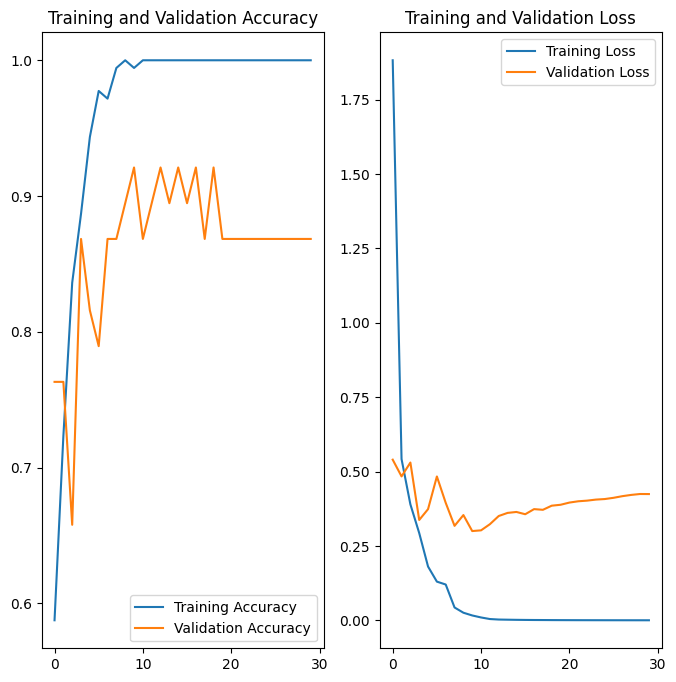

2/2 [==============================] - 0s 25ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.9259259259259259
Recall: 0.8928571428571429
F1-Score: 0.9090909090909091


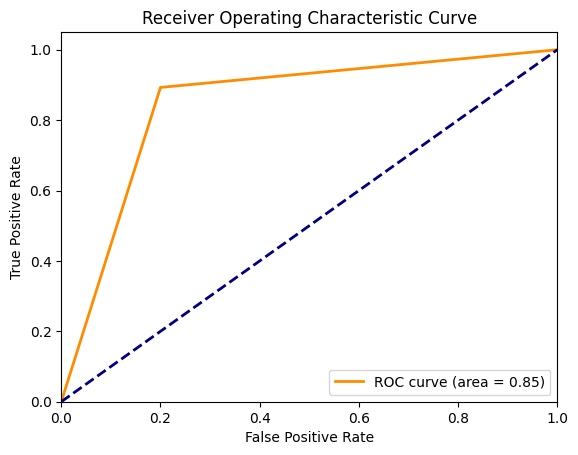

Epoch 1/30
36/36 [==============================] - 2s 26ms/step - loss: 4.9733 - accuracy: 0.6215 - val_loss: 0.9183 - val_accuracy: 0.5263
Epoch 2/30
36/36 [==============================] - 1s 17ms/step - loss: 0.9952 - accuracy: 0.7458 - val_loss: 0.6356 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 1s 18ms/step - loss: 0.7303 - accuracy: 0.7458 - val_loss: 0.5259 - val_accuracy: 0.8684
Epoch 4/30
36/36 [==============================] - 1s 17ms/step - loss: 0.4715 - accuracy: 0.7345 - val_loss: 0.7168 - val_accuracy: 0.8158
Epoch 5/30
36/36 [==============================] - 1s 20ms/step - loss: 0.3762 - accuracy: 0.8362 - val_loss: 0.4255 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 0.2307 - accuracy: 0.8983 - val_loss: 0.3191 - val_accuracy: 0.9211
Epoch 7/30
36/36 [==============================] - 1s 21ms/step - loss: 0.1169 - accuracy: 0.9718 - val_loss: 0.3974 - val_accuracy: 0.8421
Epoch 8/30
36

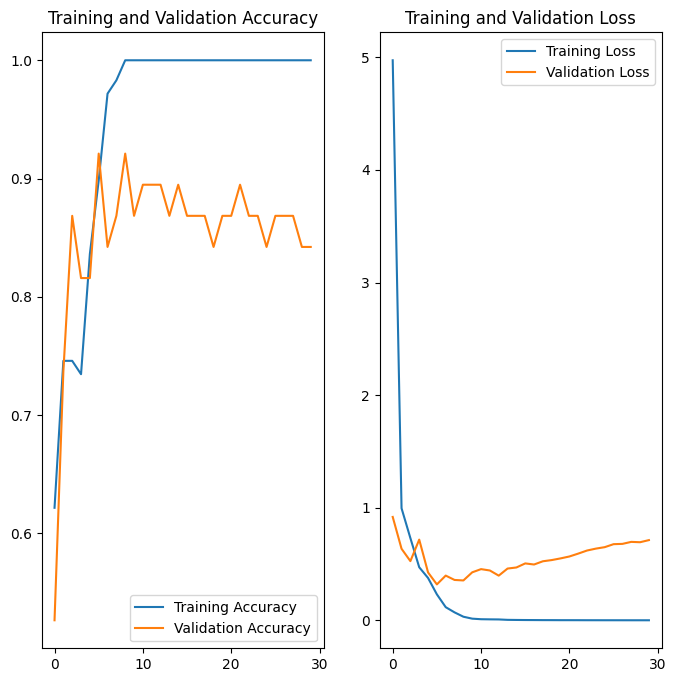

2/2 [==============================] - 0s 25ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.9166666666666666
Recall: 0.7857142857142857
F1-Score: 0.8461538461538461


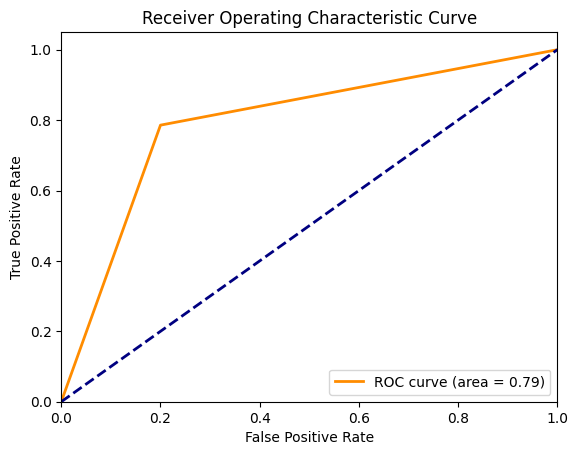

In [30]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)

    y1 = layers.Conv2D(8,(1,1) ,strides=(1,1), padding='same')(x)
    y2 = layers.Conv2D(8, (3,3), padding='same')(x)
    y = layers.Concatenate()([y1,y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.Conv2D(16, (1,1), padding='same')(y)
    y2 = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.SeparableConv2D(20, (1,1), padding='same')(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.SeparableConv2D(20, (1,1), padding='same')(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_sep_conv = tf.keras.Model(x,y)
    model_sep_conv._name = 'Model_sep_conv'

    if i == 0:
        model_sep_conv.summary()

    # COMPILING
    model_sep_conv.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')

    # TRAINING
    epochs = 30
    history = model_sep_conv.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_sep_conv.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_sep_conv
    del history

Model: "Model_4_CD"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_23 (Depth  (None, 398, 398, 1)          10        ['input_27[0][0]']            
 wiseConv2D)                                                                                      
                                                                                                  
 conv2d_375 (Conv2D)         (None, 398, 398, 8)          208       ['depthwise_conv2d_23[0][0]'] 
                                                                                                  
 max_pooling2d_132 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_375[0][0]'] 

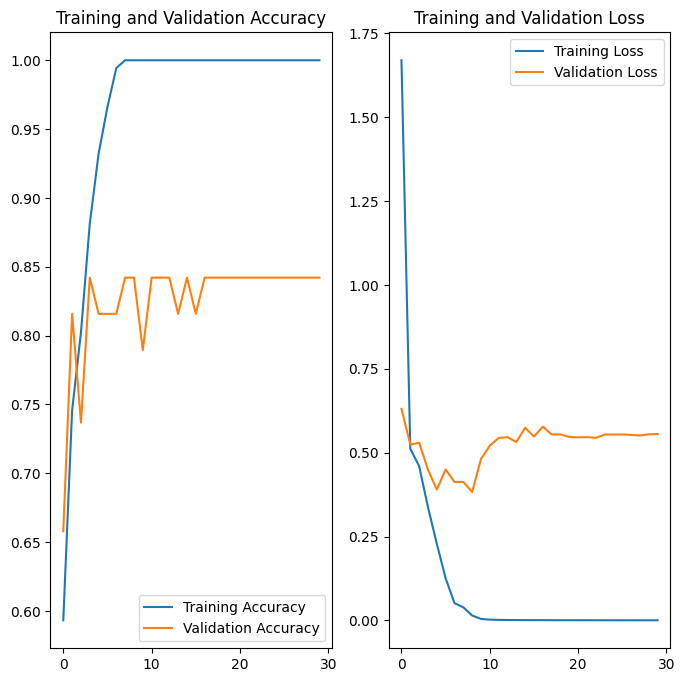

2/2 [==============================] - 0s 26ms/step
Overall Accuracy: 0.868421052631579
Confusion Matrix:
[[ 8  2]
 [ 3 25]]
Precision: 0.9259259259259259
Recall: 0.8928571428571429
F1-Score: 0.9090909090909091


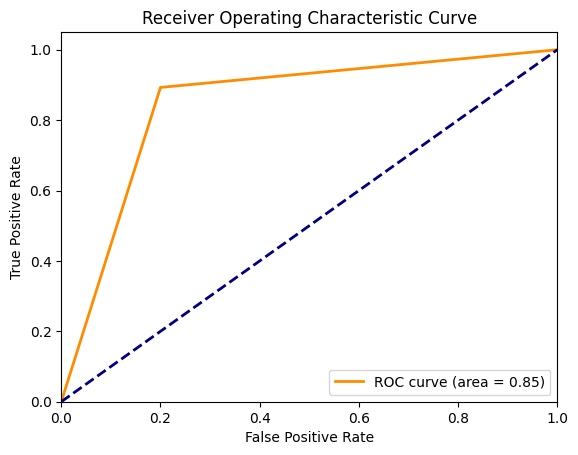

Epoch 1/30
36/36 [==============================] - 3s 47ms/step - loss: 6.4065 - accuracy: 0.5763 - val_loss: 0.7283 - val_accuracy: 0.5789 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 18ms/step - loss: 0.6151 - accuracy: 0.7232 - val_loss: 0.6255 - val_accuracy: 0.6316 - lr: 9.9781e-04
Epoch 3/30
36/36 [==============================] - 1s 16ms/step - loss: 0.4315 - accuracy: 0.8079 - val_loss: 0.4624 - val_accuracy: 0.7895 - lr: 9.9126e-04
Epoch 4/30
36/36 [==============================] - 1s 18ms/step - loss: 0.3517 - accuracy: 0.8531 - val_loss: 0.4762 - val_accuracy: 0.7105 - lr: 9.8042e-04
Epoch 5/30
36/36 [==============================] - 1s 18ms/step - loss: 0.2327 - accuracy: 0.9322 - val_loss: 0.3437 - val_accuracy: 0.8684 - lr: 9.6542e-04
Epoch 6/30
36/36 [==============================] - 1s 17ms/step - loss: 0.1807 - accuracy: 0.9435 - val_loss: 0.4042 - val_accuracy: 0.8158 - lr: 9.4641e-04
Epoch 7/30
36/36 [==============================] - 1s 2

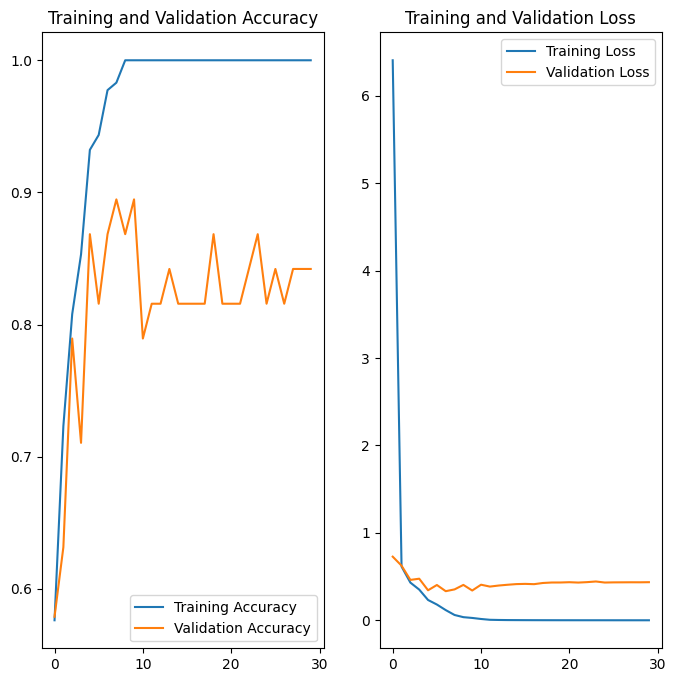

2/2 [==============================] - 0s 19ms/step
Overall Accuracy: 0.8157894736842105
Confusion Matrix:
[[ 8  2]
 [ 5 23]]
Precision: 0.92
Recall: 0.8214285714285714
F1-Score: 0.8679245283018867


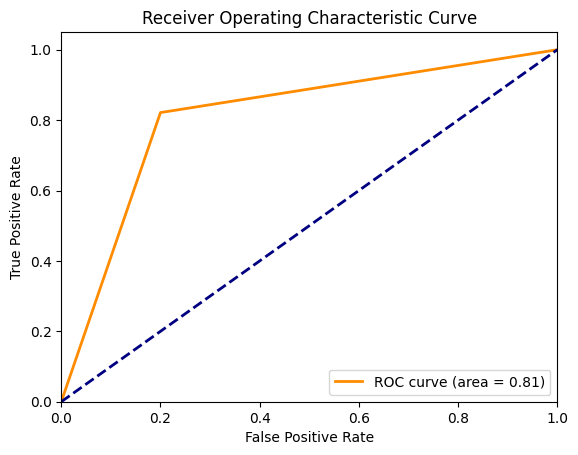

Epoch 1/30
36/36 [==============================] - 3s 30ms/step - loss: 3.9302 - accuracy: 0.6045 - val_loss: 0.5680 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 17ms/step - loss: 0.4997 - accuracy: 0.7853 - val_loss: 0.5015 - val_accuracy: 0.8158 - lr: 9.9781e-04
Epoch 3/30
36/36 [==============================] - 1s 16ms/step - loss: 0.3975 - accuracy: 0.7910 - val_loss: 0.4633 - val_accuracy: 0.8421 - lr: 9.9126e-04
Epoch 4/30
36/36 [==============================] - 1s 18ms/step - loss: 0.3159 - accuracy: 0.8814 - val_loss: 0.3923 - val_accuracy: 0.8684 - lr: 9.8042e-04
Epoch 5/30
36/36 [==============================] - 1s 16ms/step - loss: 0.1949 - accuracy: 0.9209 - val_loss: 0.3358 - val_accuracy: 0.8684 - lr: 9.6542e-04
Epoch 6/30
36/36 [==============================] - 1s 17ms/step - loss: 0.0864 - accuracy: 0.9887 - val_loss: 0.3098 - val_accuracy: 0.8947 - lr: 9.4641e-04
Epoch 7/30
36/36 [==============================] - 1s 1

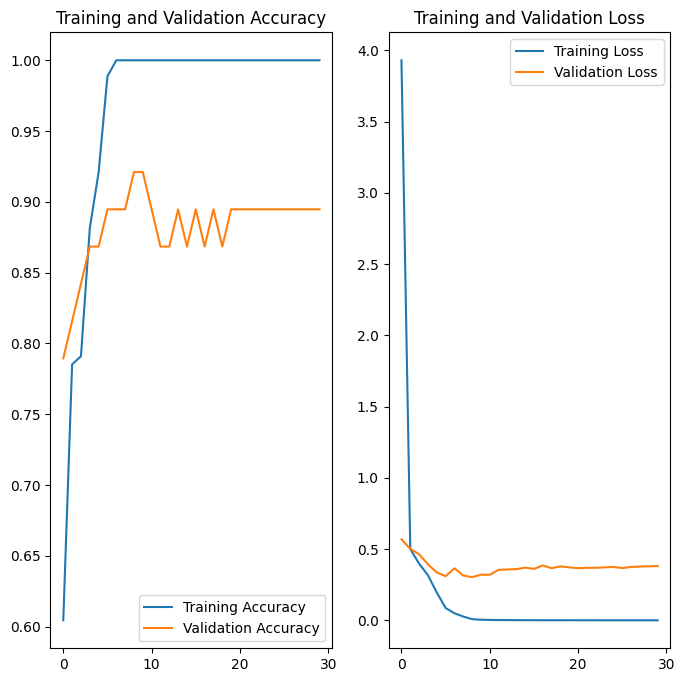

2/2 [==============================] - 0s 24ms/step
Overall Accuracy: 0.868421052631579
Confusion Matrix:
[[ 8  2]
 [ 3 25]]
Precision: 0.9259259259259259
Recall: 0.8928571428571429
F1-Score: 0.9090909090909091


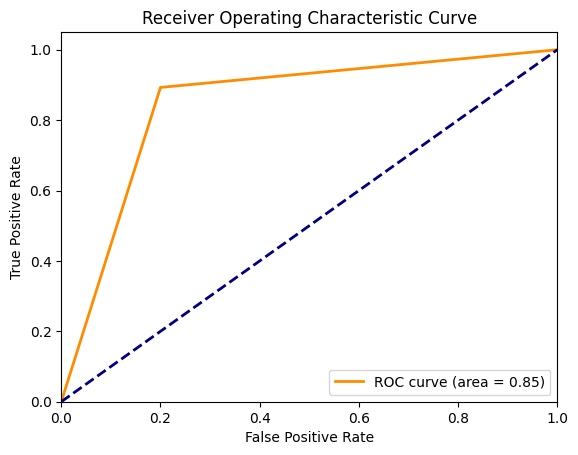

In [46]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 64, 128)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 128, 256)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_4_CD = tf.keras.Model(x,y)
    model_4_CD._name = 'Model_4_CD'

    if i == 0:
        model_4_CD.summary()

    # COMPILING
    model_4_CD.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    # SCHEDULER
    lr_scheduler = LearningRateScheduler(tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate = 0.001,
        decay_steps = 30,
        alpha=0.2,
        name='CosineDecay'
        ))

    # TRAINING
    epochs = 30
    history = model_4_CD.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=([lr_scheduler]))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_4_CD.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_4_CD
    del history

Model: "Model_4_RLR"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_30 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_26 (Depth  (None, 398, 398, 1)          10        ['input_30[0][0]']            
 wiseConv2D)                                                                                      
                                                                                                  
 conv2d_438 (Conv2D)         (None, 398, 398, 8)          208       ['depthwise_conv2d_26[0][0]'] 
                                                                                                  
 max_pooling2d_150 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_438[0][0]']

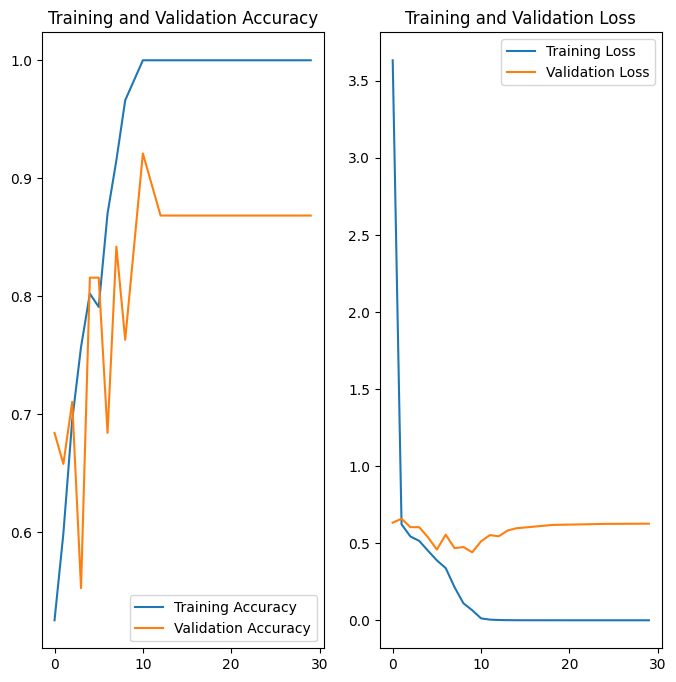

2/2 [==============================] - 0s 31ms/step
Overall Accuracy: 0.8421052631578947
Confusion Matrix:
[[ 8  2]
 [ 4 24]]
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-Score: 0.888888888888889


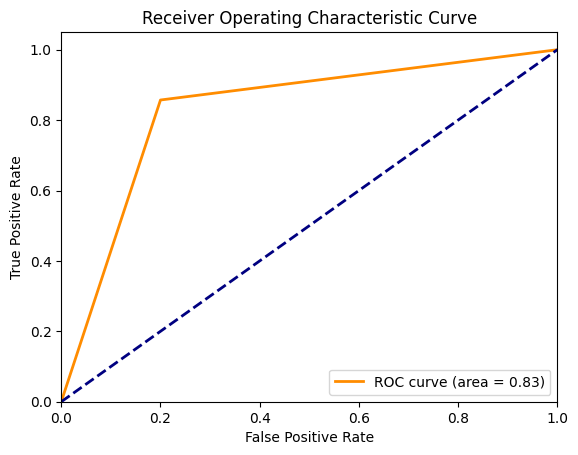

Epoch 1/30
36/36 [==============================] - 4s 39ms/step - loss: 3.3260 - accuracy: 0.6158 - val_loss: 0.6167 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 19ms/step - loss: 0.5061 - accuracy: 0.7458 - val_loss: 0.5137 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 23ms/step - loss: 0.3388 - accuracy: 0.8588 - val_loss: 0.5033 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 16ms/step - loss: 0.2204 - accuracy: 0.9209 - val_loss: 0.4120 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 18ms/step - loss: 0.1290 - accuracy: 0.9718 - val_loss: 0.4430 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 16ms/step - loss: 0.0713 - accuracy: 0.9831 - val_loss: 0.4582 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 16ms/step - loss: 0.0

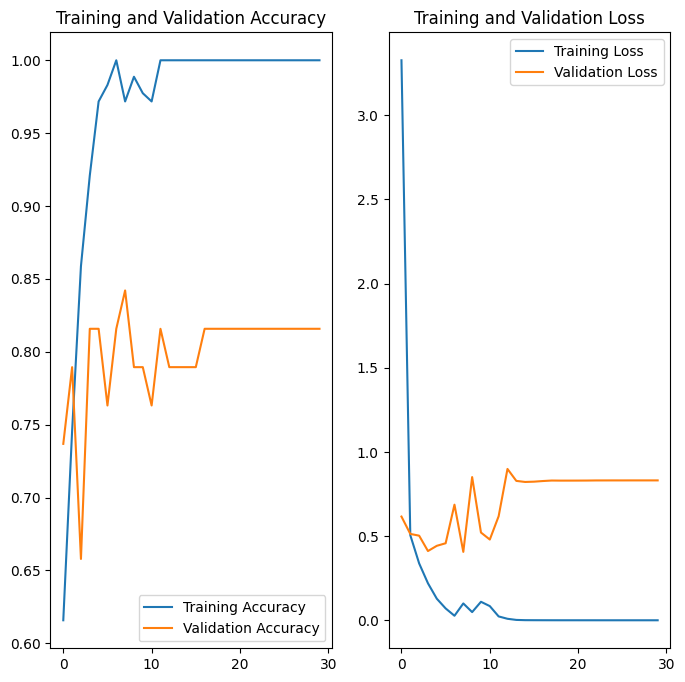

2/2 [==============================] - 0s 19ms/step
Overall Accuracy: 0.7631578947368421
Confusion Matrix:
[[ 8  2]
 [ 7 21]]
Precision: 0.9130434782608695
Recall: 0.75
F1-Score: 0.8235294117647057


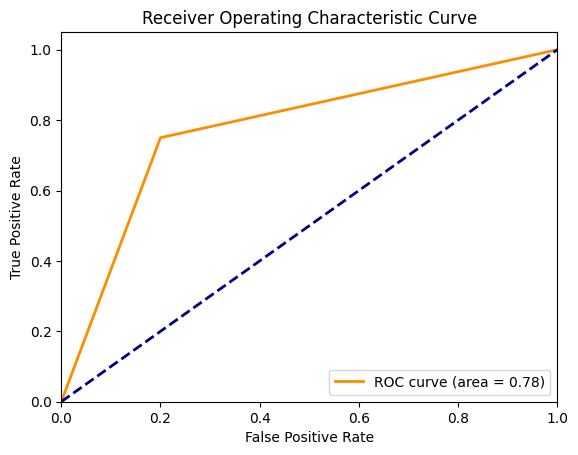

Epoch 1/30
36/36 [==============================] - 3s 37ms/step - loss: 3.4714 - accuracy: 0.6610 - val_loss: 1.0974 - val_accuracy: 0.3947 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 23ms/step - loss: 0.5738 - accuracy: 0.7062 - val_loss: 0.5519 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 20ms/step - loss: 0.5161 - accuracy: 0.7571 - val_loss: 0.5169 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 16ms/step - loss: 0.3767 - accuracy: 0.8475 - val_loss: 0.4575 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 18ms/step - loss: 0.2344 - accuracy: 0.9040 - val_loss: 0.3683 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 16ms/step - loss: 0.1503 - accuracy: 0.9605 - val_loss: 0.4062 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 16ms/step - loss: 0.1

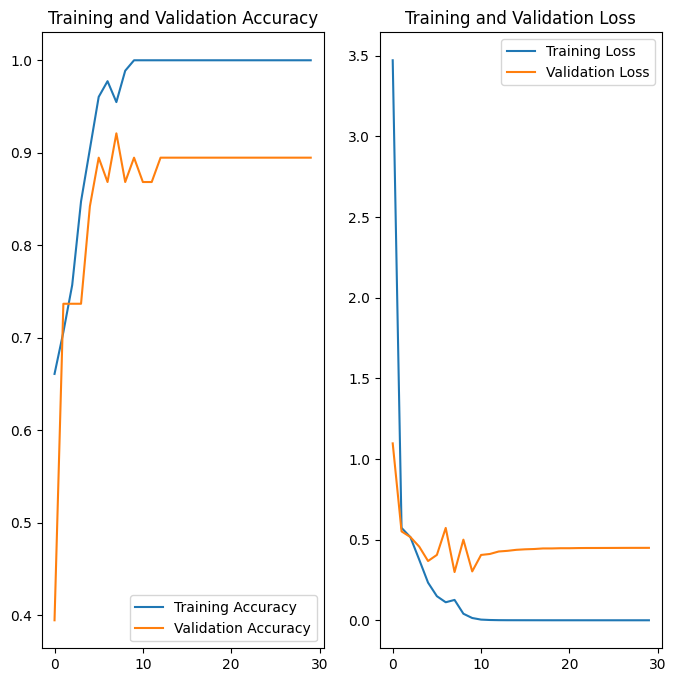

2/2 [==============================] - 0s 20ms/step
Overall Accuracy: 0.868421052631579
Confusion Matrix:
[[ 8  2]
 [ 3 25]]
Precision: 0.9259259259259259
Recall: 0.8928571428571429
F1-Score: 0.9090909090909091


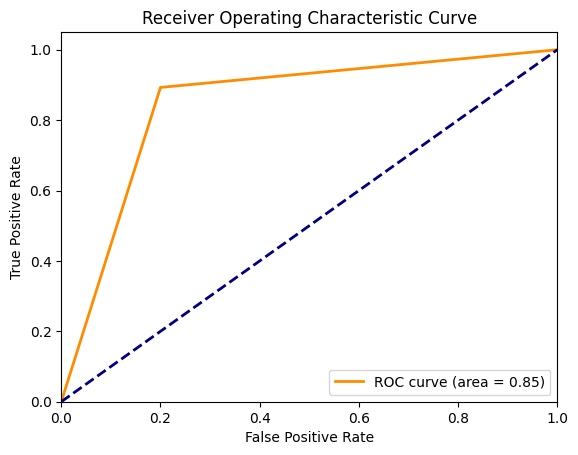

In [47]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 64, 128)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 128, 256)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_4_RLR = tf.keras.Model(x,y)
    model_4_RLR._name = 'Model_4_RLR'

    if i == 0:
        model_4_RLR.summary()

    # COMPILING
    model_4_RLR.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    # SCHEDULER
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_delta=0.001
    )

    # TRAINING
    epochs = 30
    history = model_4_RLR.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=([lr_scheduler]))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_4_RLR.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_4_RLR
    del history

Model: "Model_4_ES"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_1 (Depthw  (None, 398, 398, 1)          10        ['input_5[0][0]']             
 iseConv2D)                                                                                       
                                                                                                  
 conv2d_13 (Conv2D)          (None, 398, 398, 8)          208       ['depthwise_conv2d_1[0][0]']  
                                                                                                  
 max_pooling2d_13 (MaxPooli  (None, 199, 199, 8)          0         ['conv2d_13[0][0]']  

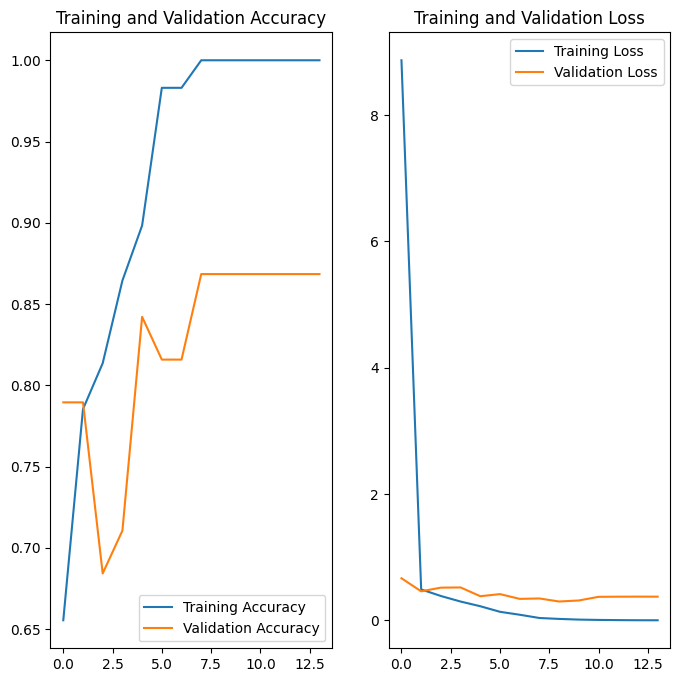

2/2 [==============================] - 4s 2s/step
Overall Accuracy: 0.8421052631578947
Confusion Matrix:
[[ 8  2]
 [ 4 24]]
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-Score: 0.888888888888889


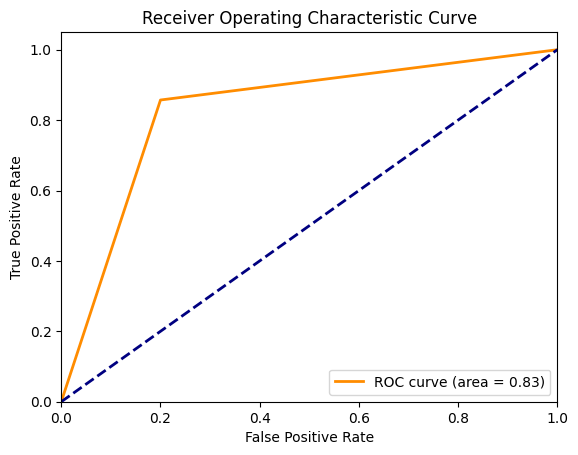

Epoch 1/30
36/36 [==============================] - 5s 53ms/step - loss: 8.3750 - accuracy: 0.5876 - val_loss: 0.7841 - val_accuracy: 0.6053
Epoch 2/30
36/36 [==============================] - 1s 20ms/step - loss: 0.4579 - accuracy: 0.7740 - val_loss: 0.3586 - val_accuracy: 0.8421
Epoch 3/30
36/36 [==============================] - 1s 20ms/step - loss: 0.2451 - accuracy: 0.9322 - val_loss: 0.4259 - val_accuracy: 0.8158
Epoch 4/30
36/36 [==============================] - 1s 20ms/step - loss: 0.1335 - accuracy: 0.9548 - val_loss: 0.2409 - val_accuracy: 0.8947
Epoch 5/30
36/36 [==============================] - 1s 21ms/step - loss: 0.0791 - accuracy: 0.9774 - val_loss: 0.2219 - val_accuracy: 0.8947
Epoch 6/30
36/36 [==============================] - 1s 21ms/step - loss: 0.0450 - accuracy: 0.9944 - val_loss: 0.1840 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 1s 20ms/step - loss: 0.0455 - accuracy: 0.9831 - val_loss: 0.2151 - val_accuracy: 0.8684
Epoch 8/30
36

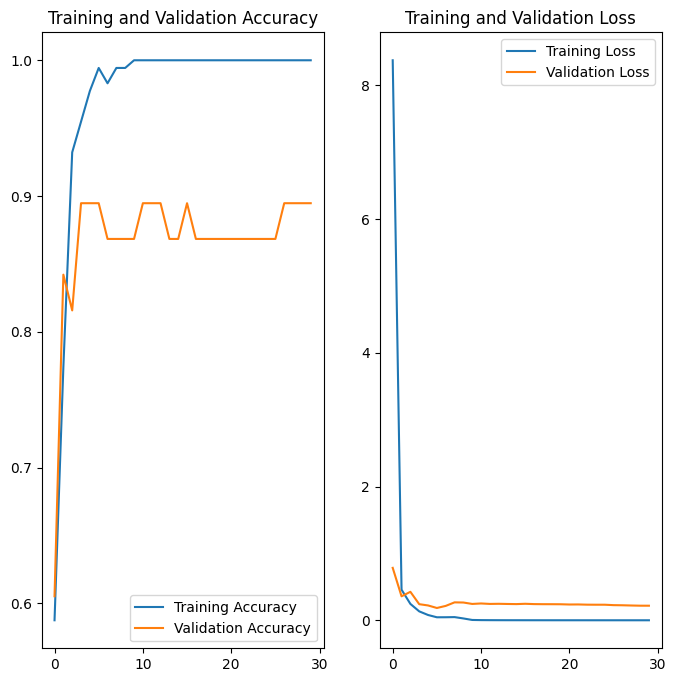

2/2 [==============================] - 0s 29ms/step
Overall Accuracy: 0.868421052631579
Confusion Matrix:
[[ 8  2]
 [ 3 25]]
Precision: 0.9259259259259259
Recall: 0.8928571428571429
F1-Score: 0.9090909090909091


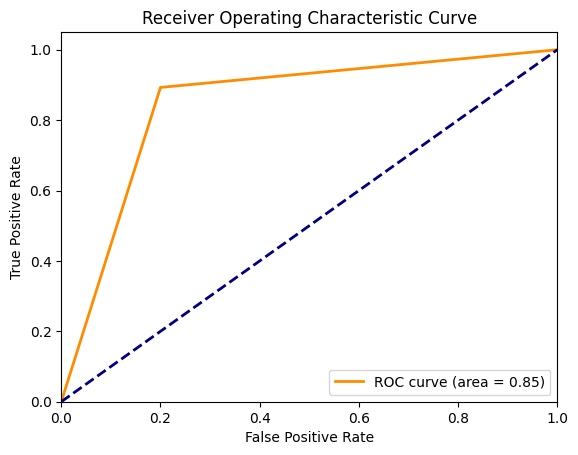

Epoch 1/30
36/36 [==============================] - 4s 36ms/step - loss: 2.7254 - accuracy: 0.5706 - val_loss: 0.6273 - val_accuracy: 0.7105
Epoch 2/30
36/36 [==============================] - 1s 24ms/step - loss: 0.5731 - accuracy: 0.6328 - val_loss: 0.5620 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 1s 21ms/step - loss: 0.5039 - accuracy: 0.7232 - val_loss: 0.5023 - val_accuracy: 0.7368
Epoch 4/30
36/36 [==============================] - 1s 21ms/step - loss: 0.4397 - accuracy: 0.8136 - val_loss: 0.5002 - val_accuracy: 0.7632
Epoch 5/30
36/36 [==============================] - 1s 23ms/step - loss: 0.3559 - accuracy: 0.8475 - val_loss: 0.5097 - val_accuracy: 0.7105
Epoch 6/30
36/36 [==============================] - 1s 26ms/step - loss: 0.2483 - accuracy: 0.9153 - val_loss: 0.3668 - val_accuracy: 0.8158
Epoch 7/30
36/36 [==============================] - 1s 28ms/step - loss: 0.1633 - accuracy: 0.9322 - val_loss: 0.5153 - val_accuracy: 0.8158
Epoch 8/30
36

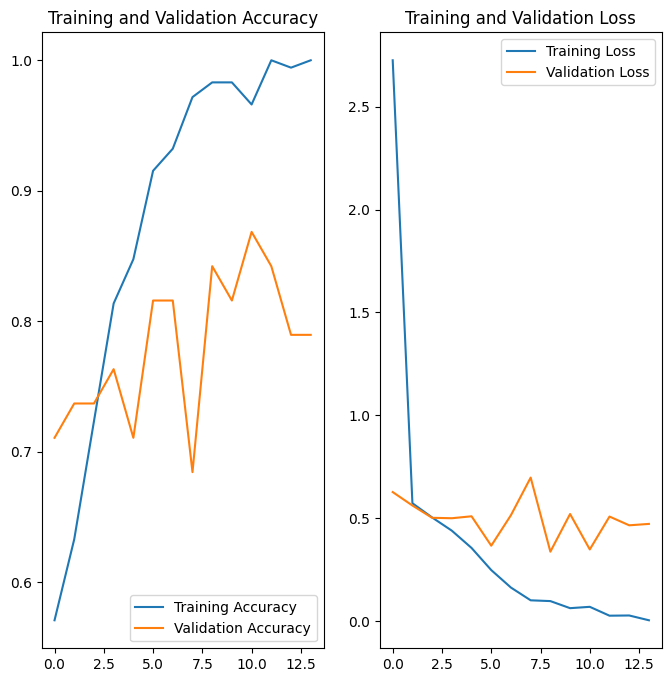

2/2 [==============================] - 1s 29ms/step
Overall Accuracy: 0.8157894736842105
Confusion Matrix:
[[ 8  2]
 [ 5 23]]
Precision: 0.92
Recall: 0.8214285714285714
F1-Score: 0.8679245283018867


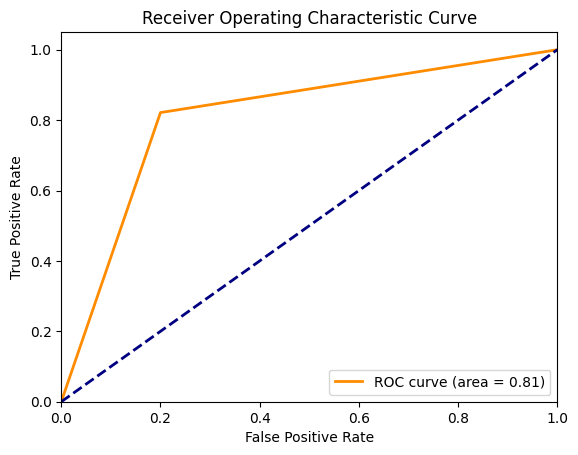

In [18]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 64, 128)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 128, 256)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_4_ES = tf.keras.Model(x,y)
    model_4_ES._name = 'Model_4_ES'

    if i == 0:
        model_4_ES.summary()

    # COMPILING
    model_4_ES.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    # SCHEDULER
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=3,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=True,
        start_from_epoch=10
    )

    # TRAINING
    epochs = 30
    history = model_4_ES.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=([early_stopping]))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_4_ES.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_4_ES
    del history

Model: "Model_4_L"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_4 (Depthw  (None, 398, 398, 1)          10        ['input_8[0][0]']             
 iseConv2D)                                                                                       
                                                                                                  
 conv2d_76 (Conv2D)          (None, 398, 398, 8)          208       ['depthwise_conv2d_4[0][0]']  
                                                                                                  
 max_pooling2d_31 (MaxPooli  (None, 199, 199, 8)          0         ['conv2d_76[0][0]']   

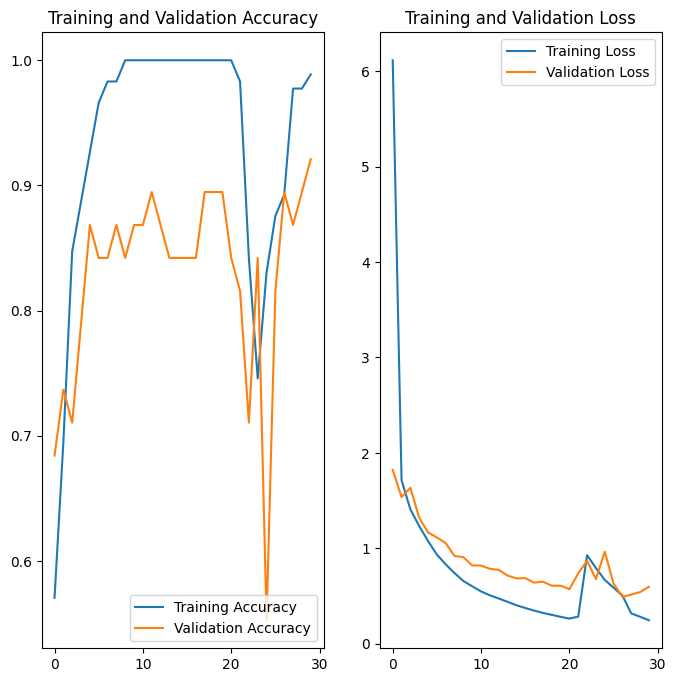

2/2 [==============================] - 0s 17ms/step
Overall Accuracy: 0.8421052631578947
Confusion Matrix:
[[ 8  2]
 [ 4 24]]
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-Score: 0.888888888888889


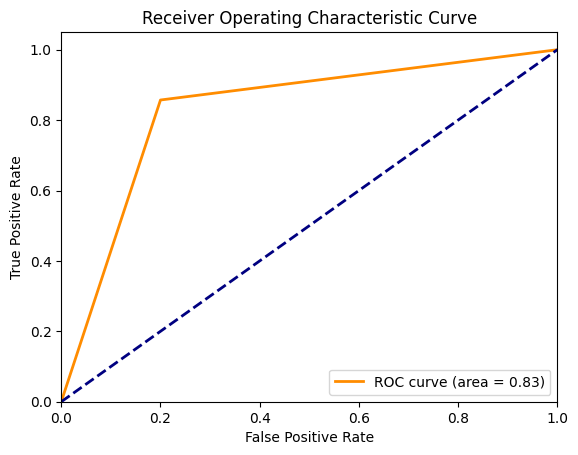

Epoch 1/30
36/36 [==============================] - 3s 28ms/step - loss: 2.4329 - accuracy: 0.6893 - val_loss: 1.2919 - val_accuracy: 0.7895
Epoch 2/30
36/36 [==============================] - 1s 15ms/step - loss: 1.0931 - accuracy: 0.7910 - val_loss: 1.0435 - val_accuracy: 0.7895
Epoch 3/30
36/36 [==============================] - 1s 15ms/step - loss: 0.8930 - accuracy: 0.8023 - val_loss: 0.8792 - val_accuracy: 0.7632
Epoch 4/30
36/36 [==============================] - 1s 16ms/step - loss: 0.6981 - accuracy: 0.8305 - val_loss: 0.8041 - val_accuracy: 0.8421
Epoch 5/30
36/36 [==============================] - 1s 16ms/step - loss: 0.5619 - accuracy: 0.9040 - val_loss: 0.6199 - val_accuracy: 0.8684
Epoch 6/30
36/36 [==============================] - 1s 15ms/step - loss: 0.4253 - accuracy: 0.9548 - val_loss: 0.4840 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 1s 15ms/step - loss: 0.3318 - accuracy: 0.9774 - val_loss: 0.4905 - val_accuracy: 0.8684
Epoch 8/30
36

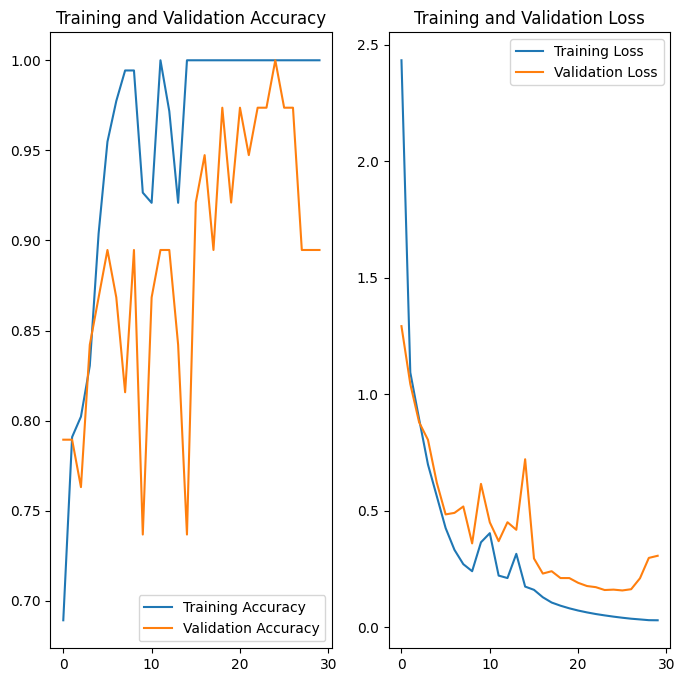

2/2 [==============================] - 0s 29ms/step
Overall Accuracy: 0.8157894736842105
Confusion Matrix:
[[ 8  2]
 [ 5 23]]
Precision: 0.92
Recall: 0.8214285714285714
F1-Score: 0.8679245283018867


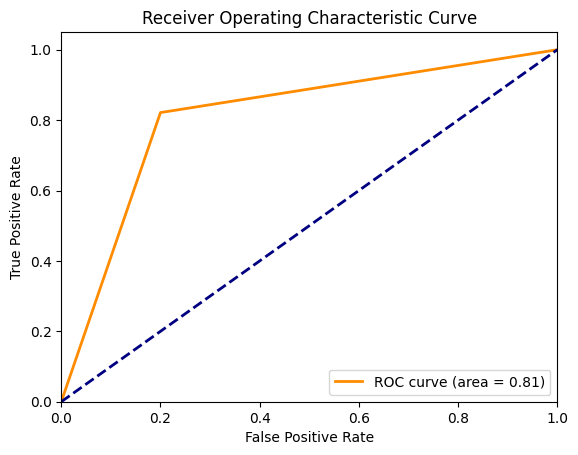

Epoch 1/30
36/36 [==============================] - 3s 28ms/step - loss: 10.9331 - accuracy: 0.6215 - val_loss: 1.4664 - val_accuracy: 0.7895
Epoch 2/30
36/36 [==============================] - 1s 15ms/step - loss: 1.3831 - accuracy: 0.7571 - val_loss: 1.3751 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 1s 15ms/step - loss: 1.3002 - accuracy: 0.7910 - val_loss: 1.2957 - val_accuracy: 0.8158
Epoch 4/30
36/36 [==============================] - 1s 16ms/step - loss: 1.0702 - accuracy: 0.8927 - val_loss: 1.4120 - val_accuracy: 0.6579
Epoch 5/30
36/36 [==============================] - 1s 16ms/step - loss: 0.9362 - accuracy: 0.9040 - val_loss: 1.1391 - val_accuracy: 0.8421
Epoch 6/30
36/36 [==============================] - 1s 16ms/step - loss: 0.7866 - accuracy: 0.9718 - val_loss: 1.0506 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 1s 16ms/step - loss: 0.7077 - accuracy: 0.9887 - val_loss: 0.9156 - val_accuracy: 0.8684
Epoch 8/30
3

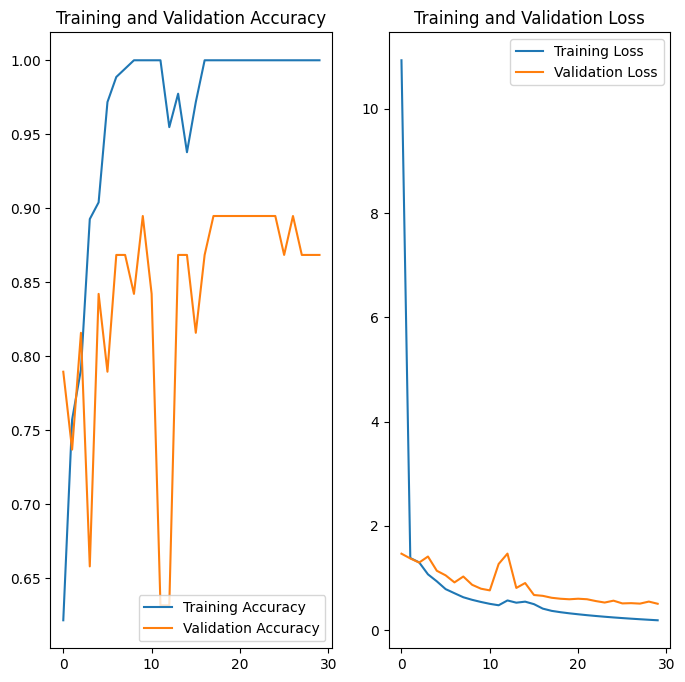

2/2 [==============================] - 0s 19ms/step
Overall Accuracy: 0.8421052631578947
Confusion Matrix:
[[ 8  2]
 [ 4 24]]
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-Score: 0.888888888888889


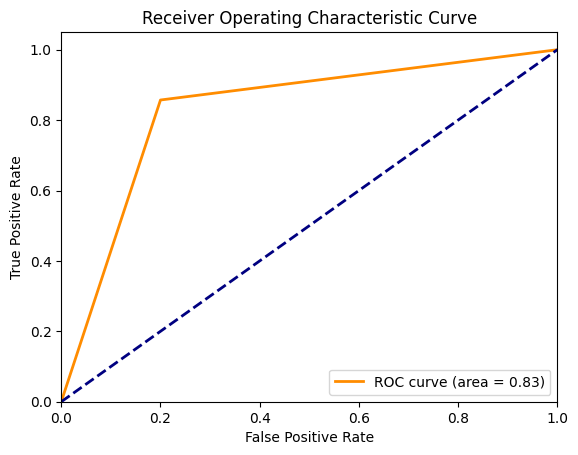

In [20]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 64, 128)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 128, 256)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu', kernel_regularizer=regularizers.L2(0.02))(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_4_L2 = tf.keras.Model(x,y)
    model_4_L2._name = 'Model_4_L'

    if i == 0:
        model_4_L2.summary()

    # COMPILING
    model_4_L2.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')

    # TRAINING
    epochs = 30
    history = model_4_L2.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val)
                          )

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_4_L2.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_4_L2
    del history

Model: "Model_4_L"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_13 (Depth  (None, 398, 398, 1)          10        ['input_17[0][0]']            
 wiseConv2D)                                                                                      
                                                                                                  
 conv2d_265 (Conv2D)         (None, 398, 398, 8)          208       ['depthwise_conv2d_13[0][0]'] 
                                                                                                  
 max_pooling2d_85 (MaxPooli  (None, 199, 199, 8)          0         ['conv2d_265[0][0]']  

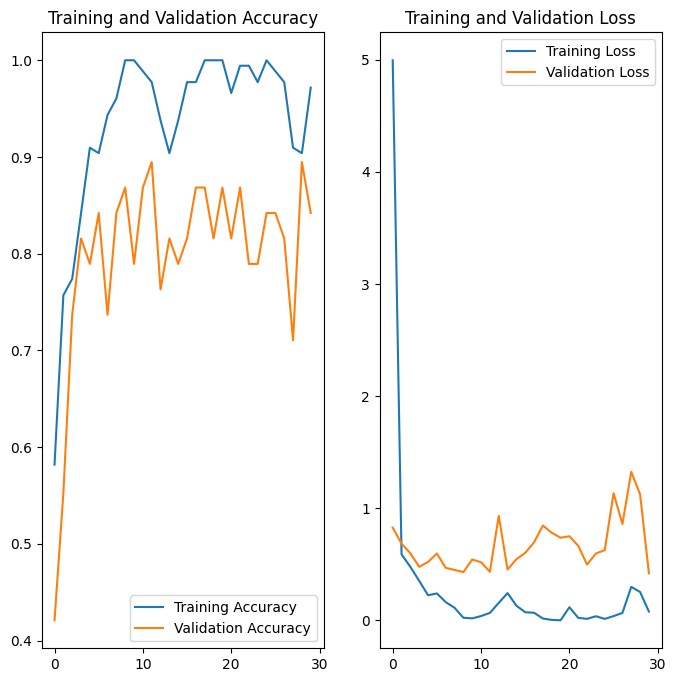

2/2 [==============================] - 0s 19ms/step
Overall Accuracy: 0.8157894736842105
Confusion Matrix:
[[ 8  2]
 [ 5 23]]
Precision: 0.92
Recall: 0.8214285714285714
F1-Score: 0.8679245283018867


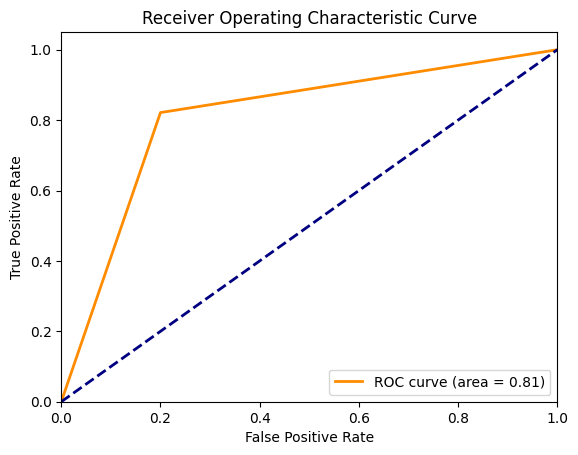

Epoch 1/30
36/36 [==============================] - 3s 37ms/step - loss: 3.5707 - accuracy: 0.5989 - val_loss: 0.5774 - val_accuracy: 0.7895
Epoch 2/30
36/36 [==============================] - 1s 16ms/step - loss: 0.5187 - accuracy: 0.7684 - val_loss: 0.5486 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 1s 17ms/step - loss: 0.4883 - accuracy: 0.7684 - val_loss: 0.5078 - val_accuracy: 0.7632
Epoch 4/30
36/36 [==============================] - 1s 16ms/step - loss: 0.4011 - accuracy: 0.7966 - val_loss: 0.4144 - val_accuracy: 0.8421
Epoch 5/30
36/36 [==============================] - 1s 16ms/step - loss: 0.3173 - accuracy: 0.8418 - val_loss: 0.4102 - val_accuracy: 0.8421
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 0.2311 - accuracy: 0.9322 - val_loss: 0.5218 - val_accuracy: 0.6579
Epoch 7/30
36/36 [==============================] - 1s 19ms/step - loss: 0.2589 - accuracy: 0.8983 - val_loss: 0.3138 - val_accuracy: 0.8684
Epoch 8/30
36

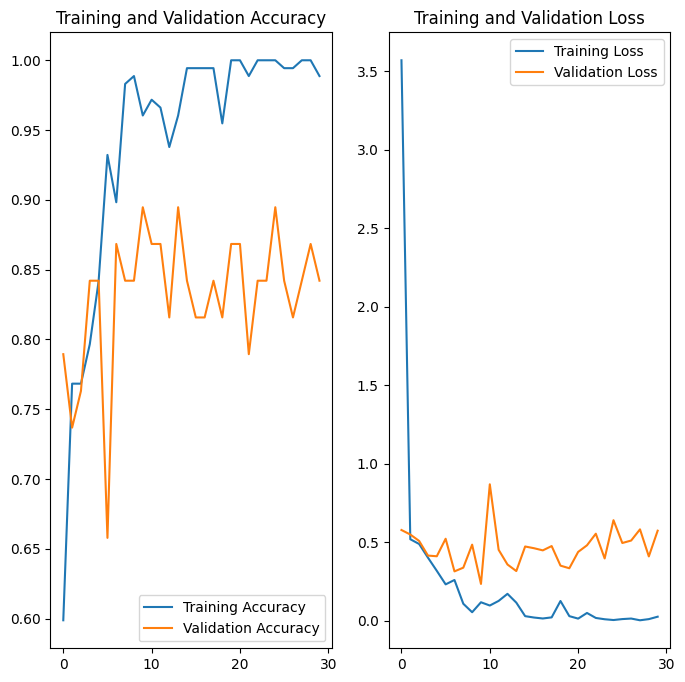

2/2 [==============================] - 0s 19ms/step
Overall Accuracy: 0.8947368421052632
Confusion Matrix:
[[ 8  2]
 [ 2 26]]
Precision: 0.9285714285714286
Recall: 0.9285714285714286
F1-Score: 0.9285714285714286


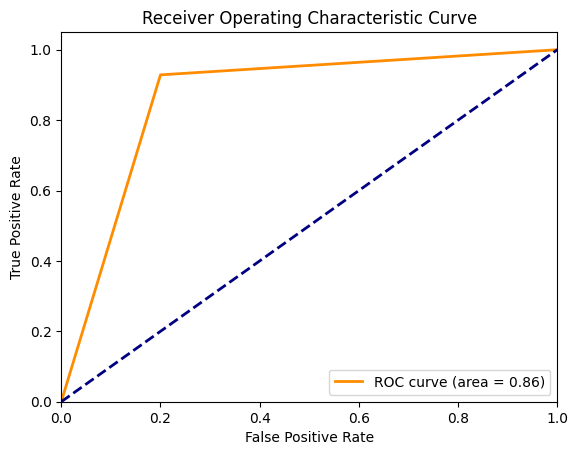

Epoch 1/30
36/36 [==============================] - 2s 28ms/step - loss: 0.8790 - accuracy: 0.5989 - val_loss: 0.6716 - val_accuracy: 0.5526
Epoch 2/30
36/36 [==============================] - 1s 16ms/step - loss: 0.5714 - accuracy: 0.7514 - val_loss: 0.6528 - val_accuracy: 0.6316
Epoch 3/30
36/36 [==============================] - 1s 16ms/step - loss: 0.6158 - accuracy: 0.7062 - val_loss: 0.6242 - val_accuracy: 0.6842
Epoch 4/30
36/36 [==============================] - 1s 20ms/step - loss: 0.5444 - accuracy: 0.7345 - val_loss: 0.5554 - val_accuracy: 0.8158
Epoch 5/30
36/36 [==============================] - 1s 18ms/step - loss: 0.5029 - accuracy: 0.7853 - val_loss: 0.5285 - val_accuracy: 0.6842
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 0.4031 - accuracy: 0.8136 - val_loss: 0.5840 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 1s 20ms/step - loss: 0.3225 - accuracy: 0.8531 - val_loss: 0.4370 - val_accuracy: 0.8684
Epoch 8/30
36

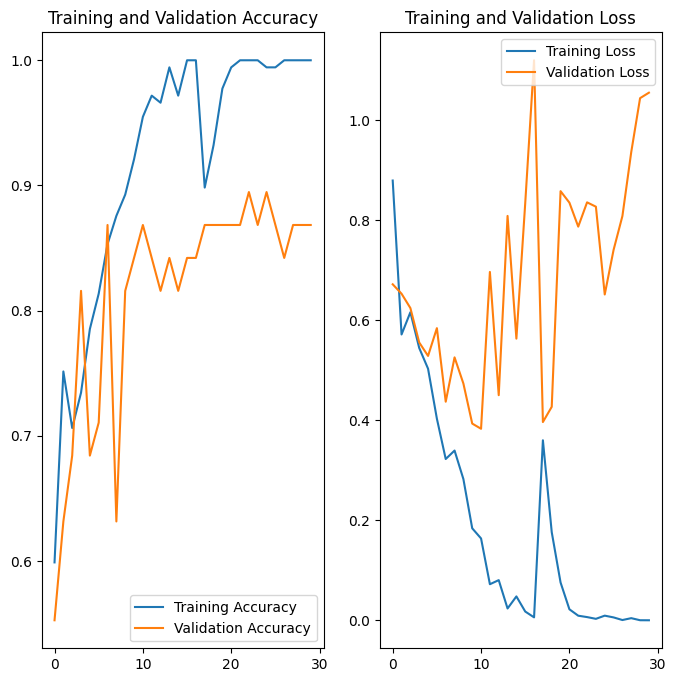

2/2 [==============================] - 0s 30ms/step
Overall Accuracy: 0.8157894736842105
Confusion Matrix:
[[ 9  1]
 [ 6 22]]
Precision: 0.9565217391304348
Recall: 0.7857142857142857
F1-Score: 0.8627450980392156


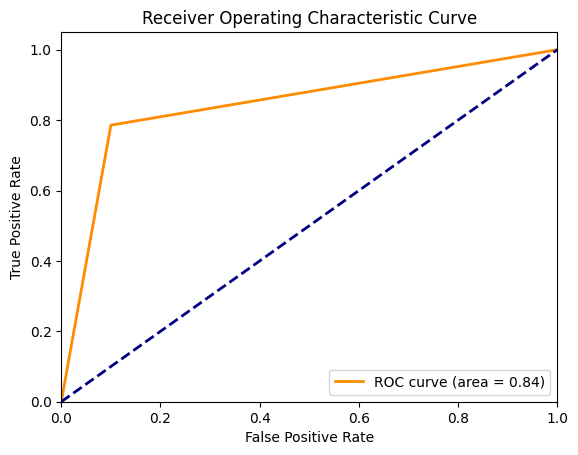

In [23]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 64, 128)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 128, 256)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dropout(0.2)(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_4_DO = tf.keras.Model(x,y)
    model_4_DO._name = 'Model_4_L'

    if i == 0:
        model_4_DO.summary()

    # COMPILING
    model_4_DO.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')

    # TRAINING
    epochs = 30
    history = model_4_DO.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val)
                          )

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_4_DO.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_4_DO
    del history